# Final Project: In the Name of Deep Learning

Group 23
* Ignace Bleukx	(ignace.bleukx@student.kuleuven.be)
* Feiyang Tang	(feiyang.tang@student.kuleuven.be)
* Toon Van Hemelen	(toon.vanhemelen@student.kuleuven.be)
* Cheng Zhou	(cheng.zhou@student.kuleuven.be)

We first import all required libraries and packages we need for this project:

## 1. Libraries

In [1]:
pip install mxnet

     |████████████████████████████████| 68.7MB 45kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [2]:
from lxml import etree
import xml.etree.ElementTree as ET
from PIL import Image
import numpy as np
import cv2
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize
import random
import re
import xml.etree.ElementTree as ET
import numpy as np

%matplotlib inline

from pathlib import Path
from mxnet import image, nd
import glob  

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Input, Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.optimizers import SGD, Adam
from keras import backend as K
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.initializers import Constant
from keras.optimizers import Adam
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.models import *
from keras.layers import *
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, AveragePooling2D
from keras.losses import binary_crossentropy
from tensorflow.keras.losses import BinaryCrossentropy


import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


## 2. Data Processing

We now fetch data from VOC-2009

Fetch data

In [3]:
# !wget -nc http://host.robots.ox.ac.uk/pascal/VOC/voc2009/VOCtrainval_11-May-2009.tar
# !wget -O VOCtrainval_11-May-2009.tar -nc https://drive.google.com/uc?export=download&id=1GhceMdP4JlBFPUS3v0_0-eLv411CqxK6
!wget -O VOCtrainval_11-May-2009.tar -nc https://www.dropbox.com/s/wjhr8gqhdctfh2v/VOCtrainval_11-May-2009.tar?dl=1
!tar -xf VOCtrainval_11-May-2009.tar --totals

--2020-06-01 11:05:14--  https://www.dropbox.com/s/wjhr8gqhdctfh2v/VOCtrainval_11-May-2009.tar?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/wjhr8gqhdctfh2v/VOCtrainval_11-May-2009.tar [following]
--2020-06-01 11:05:14--  https://www.dropbox.com/s/dl/wjhr8gqhdctfh2v/VOCtrainval_11-May-2009.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6265e4dc354eef9555091af169.dl.dropboxusercontent.com/cd/0/get/A41RHsytPUPgXpTqituYVK-sOcLXMe_N99CjQd921RB1RcC1kzQA8NCSU6V3t5xPLt-ReWvgercx5yWRP7W2VCwh6kLnLTIBlIBKhPFUnyT8nzszP43BIao34hdmvs2gYMk/file?dl=1# [following]
--2020-06-01 11:05:14--  https://uc6265e4dc354eef9555091af169.dl.dropboxusercontent.com/cd/0/get/A41RHsytPUPgXpTqituYVK-sOcLXMe_N99CjQd921RB1RcC1kzQA8NCSU6V3t5xPLt-

In [4]:
#Download weights of models
#Resnet model
!wget -O transfer_learning.h5 https://www.dropbox.com/s/5rnvttnfcszbdhy/transfer_learning.h5?dl=1
#Alexnet model
!wget -O alexnet.h5 https://www.dropbox.com/s/cwra8ruk4xkhqnk/alexnet.h5?dl=1
#Perubation model on training_images
!wget -O adversary_training.h5 https://www.dropbox.com/s/gm0zsloxkoz0v9t/adversary_train_norm10_data_reversed.h5?dl=1
#Pertubation model on validation images
!wget -O adversary_validation.h5 https://www.dropbox.com/s/lkjtehaon82fugu/adversary_val_norm10_data_reversed.h5?dl=1

--2020-06-01 11:05:48--  https://www.dropbox.com/s/5rnvttnfcszbdhy/transfer_learning.h5?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/5rnvttnfcszbdhy/transfer_learning.h5 [following]
--2020-06-01 11:05:48--  https://www.dropbox.com/s/dl/5rnvttnfcszbdhy/transfer_learning.h5
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc799372a59822cb5236cd32cf7.dl.dropboxusercontent.com/cd/0/get/A42seSm_JIxIz61Cu-xf68Nk69yEuG3IViD411UGyBp2xHpsz2z0sUTS0dFqePE09aMNcARgPcwdPeSCC5rg8hlbHjO0RbnwUangCBxgwGypO9m401fJ2bhw7sDa7VuRnbc/file?dl=1# [following]
--2020-06-01 11:05:48--  https://ucc799372a59822cb5236cd32cf7.dl.dropboxusercontent.com/cd/0/get/A42seSm_JIxIz61Cu-xf68Nk69yEuG3IViD411UGyBp2xHpsz2z0sUTS0dFqePE09aMNcARgPcwdPeSCC5rg8hlb

In [0]:
voc_root_folder = "/content/VOCdevkit/VOC2009"
img_root = "{}/JPEGImages/".format(voc_root_folder)

In [0]:
np.random.seed(0)
classes= ['person','bird', 'cat', 'cow', 'dog', 'horse', 'sheep',
     'aeroplane', 'bicycle', 'boat', 'bus', 'car', 'motorbike', 'train',
     'bottle', 'chair', 'diningtable', 'pottedplant', 'sofa', 'tvmonitor']
classes = sorted(classes)

training_dict = dict()
dict_images_classification = dict()
for c in classes:
    content = open('{}/ImageSets/Main/{}_train.txt'.format(voc_root_folder,c)).readlines()
    for line in content:
      if line.endswith("-1\n"):
        continue #The image does not contain an object of this class
      name = line[0:11]
      if name in training_dict.keys():
        training_dict[name].append(c)
      else:
        training_dict[name] = [c]

validation_dict = dict()
for c in classes:
    content = open('{}/ImageSets/Main/{}_val.txt'.format(voc_root_folder,c)).readlines()
    for line in content:
      if line.endswith("-1\n"):
        continue #The image does not contain an object of this class
      name = line[0:11]
      if name in validation_dict.keys():
        validation_dict[name].append(c)
      else:
        validation_dict[name] = [c]

dict_of_images_segmentation = dict()
for file in os.listdir('{}/Annotations'.format(voc_root_folder)):
  doc = ET.parse('{}/Annotations/'.format(voc_root_folder) + file)
  root = doc.getroot()
  filename = root.find('filename').text[0:-4] 
  for obj in root.findall('object'):
    class_name = obj.find('name').text
    box = obj.find('bndbox')
    xmax = int(box.find('xmax').text)
    ymax = int(box.find('ymax').text)
    xmin = int(box.find('xmin').text)
    ymin = int(box.find('ymin').text)
    info = (class_name,xmax,xmin,ymax,ymin)
    if filename in dict_of_images_segmentation:
      dict_of_images_segmentation[filename].append(c)
    else:
      dict_of_images_segmentation[filename] = [info]

Now we examine the created datasets. As we can see, the most of the images contain a person (in both training and validation datasets). This will be important when we choose the appropiate metrics to evaluate the classification models.

In [7]:
dicts = [training_dict, validation_dict]
distribution = np.zeros((len(classes),3))
np_classes = np.array(classes)
verbose = True
i = 0
for d in dicts:
  for info in d.values():
    for c in classes:
      if c in info:
        row = np.where(np_classes == c)
        distribution[row,i] +=1
  i+=1

class_colwidth = max(len(c) for c in classes) + 2  # padding
print("Class".ljust(class_colwidth),"Training","Validation",sep="\t")
for r in range(len(classes)):
    print(classes[r].upper().ljust(class_colwidth), 
          str(distribution[r,0]).ljust(len("Training")),
          str(distribution[r,1]).ljust(len("Validation")),sep="\t")


Class        	Training	Validation
AEROPLANE    	201.0   	211.0     
BICYCLE      	173.0   	185.0     
BIRD         	264.0   	246.0     
BOAT         	173.0   	159.0     
BOTTLE       	238.0   	215.0     
BUS          	136.0   	127.0     
CAR          	384.0   	374.0     
CAT          	266.0   	277.0     
CHAIR        	370.0   	377.0     
COW          	87.0    	88.0      
DININGTABLE  	182.0   	176.0     
DOG          	317.0   	333.0     
HORSE        	162.0   	167.0     
MOTORBIKE    	177.0   	168.0     
PERSON       	1408.0  	1511.0    
POTTEDPLANT  	179.0   	173.0     
SHEEP        	67.0    	65.0      
SOFA         	196.0   	195.0     
TRAIN        	165.0   	160.0     
TVMONITOR    	183.0   	177.0     


In the following cell, we convert the dictionaries to dataframes so it can be used in the training of the keras models later on.

In [8]:
import pandas as pd
import cv2

def to_labels(info_vector):
  
  return info_vector

training_images = []
training_labels = []
classes_np = np.array(classes)
training_filenames = list(training_dict.keys())
for filename in training_filenames:
  training_images.append(filename+".jpg")
  training_labels.append(to_labels(training_dict[filename]))

training_dataframe = pd.DataFrame({"filename":training_images,
                          "class": training_labels},
                          columns=["filename","class"])

validation_images= [] 
validation_labels= []
validation_filenames = list(validation_dict.keys())
for filename in validation_filenames:
  validation_images.append(filename+".jpg")
  validation_labels.append(to_labels(validation_dict[filename]))

validation_dataframe = pd.DataFrame({"filename":validation_images,
                                     "class":validation_labels},
                                    columns=["filename","class"])

print("Training dataframe")
print(training_dataframe.head(),end="\n\n")
print("Validation dataframe")
print(validation_dataframe.head(),end="\n\n")

Training dataframe
          filename        class
0  2008_000033.jpg  [aeroplane]
1  2008_000037.jpg  [aeroplane]
2  2008_000151.jpg  [aeroplane]
3  2008_000197.jpg  [aeroplane]
4  2008_000291.jpg  [aeroplane]

Validation dataframe
          filename                class
0  2008_000021.jpg          [aeroplane]
1  2008_000064.jpg          [aeroplane]
2  2008_000251.jpg     [aeroplane, car]
3  2008_000367.jpg  [aeroplane, person]
4  2008_000804.jpg          [aeroplane]



## 3. Classification

### 3.1 Transfer Learning for Classification

A lot of well-working neural network models already exists for classification of objects: For this reason one can opt to rely on the feature detections of a good model and try to repurpose the model so it can be trained on our dataset. In this case we are using the ResNet50V2 model for transfer learning which is a deep residual network with as the name suggest 50 layers. A Residual network opt to solve problems that deeper networks face when training slows down and accuracy starts levelling off or decreasing.![alt text](https://neurohive.io/wp-content/uploads/2019/01/resnet-e1548261477164.png) These networks have shown to be easier to optimize by reducing the problem of vanishing/exploding gradients. The model used is imported with weights (derived from the ImageNet dataset). 

**Methodology**

To use the model for transfer learning we import the resnetV2 model without the final classification layer (include_top = false). A new model is created by adding a couple of Dense layers to the existing pretrained network with some dropout layers inbetween to reduce overfitting. All layers for the pretrained resnet model are frozen (made non trainable) so that originall weights are kept and only the dense layers are trained. In short the idea is to map the labels from the pretrained network onto the labels we use. 


**First** the input shape needs to be defined for the pretrained model. (The Resnet model is already trained on input size 224 x 224 so no further up or down sampling is required.

In [0]:
input_shape = (224,224,3)

In [0]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import models, layers
def get_transfer_learning_model():
  
  resnet_model = ResNet50V2(include_top = False,input_shape=input_shape)
  output = resnet_model.layers[-1].output
  output = layers.Flatten()(output)
  resnet_model = models.Model(inputs=resnet_model.input, outputs=output)
  
  for layer in resnet_model.layers:
      layer.trainable = False

  transfer_learning_model = models.Sequential()
  transfer_learning_model.add(resnet_model)
  transfer_learning_model.add(layers.Dense(512, activation='relu', input_dim=input_shape))
  transfer_learning_model.add(layers.Dropout(0.3))
  transfer_learning_model.add(layers.Dense(512, activation='relu'))
  transfer_learning_model.add(layers.Dropout(0.3))
  transfer_learning_model.add(layers.Dense(units=20, activation='sigmoid'))
  
  return transfer_learning_model

In [11]:
from tensorflow.keras.metrics import Precision, Recall
from tensorflow_addons.metrics import F1Score

transfer_learning_model = get_transfer_learning_model()
thresholds = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
transfer_learning_model.compile(loss='binary_crossentropy',optimizer="sgd",metrics=[F1Score(20), Precision(thresholds=thresholds), Recall(thresholds=thresholds)])

94674944/94668760 [==============================] - 1s 0us/step


In [12]:
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 64
train_datagen_resnet = ImageDataGenerator(preprocessing_function = preprocess)

train_generator_resnet = train_datagen_resnet.flow_from_dataframe(training_dataframe,
                                                    directory="{}/JPEGImages".format(voc_root_folder),
                                                    target_size=(input_shape[0],input_shape[1]),
                                                    batch_size=batch_size,
                                                    class_mode="categorical")

validation_generator_resnet = train_datagen_resnet.flow_from_dataframe(validation_dataframe,
                                                    directory="{}/JPEGImages".format(voc_root_folder),
                                                    target_size=(input_shape[0],input_shape[1]),
                                                    batch_size=batch_size,
                                                    class_mode="categorical")

Found 3473 validated image filenames belonging to 20 classes.
Found 3581 validated image filenames belonging to 20 classes.


In [0]:
from tensorflow.keras.callbacks import EarlyStopping, History, ModelCheckpoint

num_epochs = 100
callbacks = [EarlyStopping(monitor="val_loss", patience=10), History(), ModelCheckpoint("content/transfer_learning.h5",save_best_only=True)]
# history = tranfer_learning_model.fit(x=train_generator_resnet,
#                             validation_data=validation_generator_resnet,
#                             steps_per_epoch=3456/batch_size,
#                             validation_steps = 3456/batch_size,
#                             epochs=num_epochs,
#                             verbose=1,
#                             callbacks=callbacks)

transfer_learning_model.load_weights("transfer_learning.h5")

![alt text](https://www.dropbox.com/s/021vklxeziupi0q/resnet-training1.JPG?dl=1)
![alt text](https://www.dropbox.com/s/sh2k86mfs5jq1jk/resnet-training2.JPG.png?dl=1)


**Results** 
As shown above the model manages to adapt to new classification labels. However since we only map the labels from the pretrained model on a new one, overfitting can presents itself rapidly and as such the final f1 score is limited to early 60% . 

**Improvements to be made** 
Extra steps that were experimented with and can add to the accuracy are:


1) Data Augmentation. Further increasing the data augmentation for the training samples can increase performance of the model by increasing the training sample size. Experiments where done with shearing,shifting,cropping, rotating  and flipping the training images with showed an improvement in accuracy albeit a very small change of only a couple of percentages. A higher data augmentation might further increase the model's accuracy and reduce the over fitting behaviour. 

2) Fine-Tuning: For Fine-tuning we tried to unfreeze some layers of the pretrained model (top layers so that feature detecting layers remain unaffected) and batchnormalization layers. Results where however not as expected as model started overfitting rapidly. Fine-tuning has shown to be a delicate process in which a lot of experimentation needs to be done with choosing which layers to freeze/unfreeze, which metrics to use and which optimizer and learning rate to adapt. (learning rate for fine-tuning should be chosen as low to reduce overfitting)

Preferably an ideal combination of above options should be used to fully optimize the transfer learned network. 


### 3.2 Classification from Scratch
In this section we train a CNN from scratch. We choose for the Alexnet architecure as it is a fairly simple yet expressive network.

Here we exployed **AlexNet** proposed by Krizhevsky et al. in 2012 as our model for scratch to achieve classification task. AlexNet famously won the 2012 ImageNet LSVRC-2012 competition by a large margin (15.3% VS 26.2% (second place) error rates). It has a few obvious advantages:

* Uses `Relu` instead of `Tanh` to add non-linearity. This accelerates the speed by 6 times at the same accuracy.
* Use dropout instead of regularisation to deal with overfitting. However the training time is doubled with the dropout rate of 0.5.
* Overlap pooling to reduce the size of network. It reduces the top-1 and top-5 error rates by 0.4% and 0.3%, repectively.

The basic AlexNet architecture is showned below:

![alt text](https://www.learnopencv.com/wp-content/uploads/2018/05/AlexNet-1.png)

AlexNet consists of **5 Convolutional Layers** and **3 Fully Connected Layers**.

Multiple Convolutional Kernels (a.k.a filters) extract interesting features in an image. In a single convolutional layer, there are usually many kernels of the same size. For example, the first convolutional layer of AlexNet contains 96 kernels of size `(11x11x3)`. Note the width and height of the kernel are usually the same and the depth is the same as the number of channels.

The first two convolutional layers are followed by the Overlapping Max Pooling layers that we describe next. The third, fourth and fifth convolutional layers are connected directly. The fifth convolutional layer is followed by an Overlapping Max Pooling layer, the output of which goes into a series of two fully connected layers. The second fully connected layer feeds into a softmax classifier with 1000 class labels.

ReLU nonlinearity is applied after all the convolution and fully connected layers. The ReLU nonlinearity of the first and second convolution layers are followed by a local normalization step before doing pooling. But researchers later didn’t find normalization very useful. So we will not go in detail over that.

To reduce the chance of overfitting, there are a few ways that the authors proposed in the original paper of AlexNet, one of the most widely used is data augmentation (by mirroring or random drops).

Reference:
* Alex Krizhevsky, Ilya Sutskever, and Geoffrey E. Hinton. 2017. ImageNet classification with deep convolutional neural networks. Commun. ACM 60, 6 (June 2017), 84–90. DOI:https://doi.org/10.1145/3065386



In the following code snippets we provide a function to create the CNN used in the rest of the assignment. This model is then trained to fit our data and classes.

In [0]:
from tensorflow.keras import datasets, layers, models

def get_alexnet_model(input_shape,nb_classes):
  model = models.Sequential(name="Alexnet")
  #First we create the convolutional layers
  model.add(layers.Conv2D(filters=96, kernel_size=(11,11),input_shape=input_shape,strides=4,padding="valid",activation="relu",kernel_initializer="he_normal",use_bias=True))
  model.add(layers.MaxPool2D(pool_size=(3,3),strides=(2,2),padding="valid"))
  model.add(layers.Conv2D(filters=256,kernel_size=(5,5),  strides=1, padding="same",activation="relu", kernel_initializer="he_normal",use_bias=True))
  model.add(layers.MaxPool2D(pool_size=(3,3),strides=(2,2),padding="valid"))
  model.add(layers.Conv2D(filters=384, kernel_size=(3,3),strides=1, activation="relu", padding="same",kernel_initializer="he_normal", use_bias=True))
  model.add(layers.Conv2D(filters=384, kernel_size=(3,3),strides=1, activation="relu", padding="same",kernel_initializer="he_normal"))
  model.add(layers.Conv2D(filters=256, kernel_size=(3,3),strides=1, activation="relu", padding="same",kernel_initializer="he_normal"))
  model.add(layers.MaxPool2D(pool_size=(3,3), strides= (2,2),padding= "valid"))
  
  #Next we flatten the output of the convolutional layers and feed it to the fully connected layers
  model.add(layers.Dropout(0.5))
  model.add(layers.Flatten())
  model.add(layers.Dense(units=4096, activation="relu"))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(units=4096, activation="relu"))
  model.add(layers.Dense(units=1000, activation="relu"))
  #Lastly, we add a dense layer to be able to classify the input
  model.add(layers.Dense(units=nb_classes,activation="sigmoid"))
  return model

We compile the model and examine its architecture. The total amount of parameters to be trained is 62.398.364. As this is a large amount of parameters, we introduced some dropout layers to reduce the overfitting behaviour of the model.

In [15]:
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.metrics import Precision, Recall
from tensorflow_addons.metrics import HammingLoss, F1Score
alexnet = get_alexnet_model((227,227,3),len(classes))

alexnet.compile(optimizer=Adadelta(lr=1),loss='binary_crossentropy',metrics=[F1Score(num_classes=20),Precision(),Recall()])

alexnet.summary()

Model: "Alexnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       8849

In the following celll, we create the image data generators to be used when training the model.

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
batch_size = 64
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator_alexnet = train_datagen.flow_from_dataframe(training_dataframe,
                                                    directory="VOCdevkit/VOC2009/JPEGImages",
                                                    target_size=(227,227),
                                                    batch_size=batch_size,
                                                    class_mode="categorical")

validation_generator_alexnet = train_datagen.flow_from_dataframe(validation_dataframe,
                                                    directory="VOCdevkit/VOC2009/JPEGImages",
                                                    target_size=(227,227),
                                                    batch_size=batch_size,
                                                    class_mode="categorical")

Found 3473 validated image filenames belonging to 20 classes.
Found 3581 validated image filenames belonging to 20 classes.


In [0]:
import tensorflow as tf
num_epochs = 100
# model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/ComputerVision/alexnet.h5',
#                                                           save_weights_only=True,
#                                                           monitor='loss',
#                                                           mode='min',
#                                                           save_best_only=True)
# alexnet.fit(x=train_generator_alexnet,
#                          validation_data=validation_generator_alexnet,
#                          steps_per_epoch=3456/batch_size,
#                          validation_steps = 3520/batch_size,
#                          epochs=num_epochs,
#                         callbacks=[model_checkpoint])
alexnet.load_weights("alexnet.h5")

Evaluation of model trained from scratch. 

In [18]:
print("Evaluation on training images")
alexnet.evaluate(train_generator_alexnet)
print("Evaluation on validation images")
alexnet.evaluate(validation_generator_alexnet)

Evaluation on training images
55/55 [==============================] - 49s 893ms/step - loss: 0.1156 - f1_score: 0.5134 - precision_1: 0.7695 - recall_1: 0.6090
Evaluation on validation images
56/56 [==============================] - 52s 920ms/step - loss: 0.2164 - f1_score: 0.2584 - precision_1: 0.5118 - recall_1: 0.3692


[0.2163780927658081,
 array([0.54020613, 0.15929203, 0.31282052, 0.39694658, 0.02575107,
        0.34444445, 0.31201246, 0.32558137, 0.0486618 , 0.12499999,
        0.05      , 0.2904412 , 0.1596244 , 0.2638298 , 0.66606116,
        0.17391305, 0.22807018, 0.1       , 0.40174672, 0.24291497],
       dtype=float32),
 0.5118434429168701,
 0.36924219131469727]

It is very clear the alexnet implementation performed quite poor in comparison with the transfer learning model. This is partly due to the limited expressiveness of the architecture used and partly because it is very hard to keep on training the network without it overfitting the data. Even with the dropout layers in the architecture, it is very clear that the loss on the validation is much higher than that on the training images.

## 4. Segmentation

Here we use the downloaded dataset above and start making our own training, validation and testing datasets:

In [19]:
voc_root_folder = "/content/VOCdevkit/VOC2009"

print(len(voc_root_folder))

path = voc_root_folder

folders = []
for r, d, f in os.walk(path):
    for folder in d:
        folders.append(os.path.join(r, folder))

for f in folders:
    print(f)

26
/content/VOCdevkit/VOC2009/SegmentationObject
/content/VOCdevkit/VOC2009/Annotations
/content/VOCdevkit/VOC2009/SegmentationClass
/content/VOCdevkit/VOC2009/ImageSets
/content/VOCdevkit/VOC2009/JPEGImages
/content/VOCdevkit/VOC2009/ImageSets/Layout
/content/VOCdevkit/VOC2009/ImageSets/Segmentation
/content/VOCdevkit/VOC2009/ImageSets/Main


Here we display filenames along with their width, height, name, xmin, ymin, xmax, and ymax.

In [20]:
columns = ['filename', 'width', 'height', 'objectName', 'xmin','ymin','xmax','ymax']
annotations_df = pd.DataFrame(columns=columns) 
annotation_folder = '/content/VOCdevkit/VOC2009/Annotations'
annotation_files = os.listdir(annotation_folder)
for file in annotation_files:
 doc = ET.parse('/content/VOCdevkit/VOC2009/Annotations/' + file)
 root = doc.getroot()
 filename = root.find('filename').text
 #print(filename)
 size = root.find('size')
 height = int(size.find('height').text)
 width = int(size.find('width').text)
 for obj in root.findall('object'):
  #print(obj)
  objectName = obj.find('name').text
  #print(objectName)
  box = obj.find('bndbox')
  xmax = int(box.find('xmax').text)
  ymax = int(box.find('ymax').text)
  xmin = int(box.find('xmin').text)
  ymin = int(box.find('ymin').text)
  df = pd.DataFrame([[filename,width,height,objectName,xmin,ymin,xmax,ymax]],columns = columns)
  annotations_df = annotations_df.append(df)

annotations_df.reset_index(drop=True,inplace=True)
print(annotations_df.shape)
print(annotations_df.head())

(21544, 8)
          filename width height objectName xmin ymin xmax ymax
0  2007_002094.jpg   500    332       bird   72    1  335  331
1  2007_003131.jpg   500    334       boat  340  214  410  330
2  2008_001751.jpg   500    375      chair    1  139  133  363
3  2008_001751.jpg   500    375      chair  142  135  244  283
4  2008_001751.jpg   500    375      chair  287  137  385  298


Now we start to split our datasets for training (900/1500), validation (300/1500) and testing (300/1500).

In [21]:
#this is the combination of train.txt and val.txt, so i have to split it by ourselves
seg_valid = '/content/VOCdevkit/VOC2009/ImageSets/Segmentation/trainval.txt' 

#get all filenames from trainval and do a random shuffle with seed(4)
raw_dataset = []
valid_file = open(seg_valid,"r")
for k in valid_file:
     d = k.split()[0]
     raw_dataset.append(d)
print(len(raw_dataset))
random.seed(4)
random.shuffle(raw_dataset)

#split the dataset into train, valid, test 0-1498. 
filenames = np.array(raw_dataset)
nb_of_images = len(raw_dataset)
splitted_arrays = np.split(filenames,[int(0.6*(nb_of_images-1)),int(0.8*(nb_of_images-1))])

seg_train_filenames = splitted_arrays[0]
seg_val_filenames = splitted_arrays[1]
seg_test_filenames = splitted_arrays[2]

print(len(seg_train_filenames)) #898
print(len(seg_val_filenames)) #300
print(len(seg_test_filenames)) #301

1499
898
300
301


### 4.1 Segmentation on Raw Dataset

In [0]:
#contruct training set

img_rows = 128
img_cols = 128

image_path = '/content/VOCdevkit/VOC2009/JPEGImages/'
segmentation_classes_path = '/content/VOCdevkit/VOC2009/SegmentationClass/'

seg_train_images = [] 
segmented_images = []
grayscale_images = []
binary_segmented_images = []
gray_segmented_images=[]

for img_name in seg_train_filenames:
    img = io.imread(image_path+img_name+'.jpg')
    img = cv2.resize(img, dsize=(img_rows,img_cols), interpolation=cv2.INTER_CUBIC) 
    seg_train_images.append(img)
    
    seg_img = io.imread(segmentation_classes_path+img_name+'.png')
    seg_img = cv2.resize(seg_img, dsize=(img_rows,img_cols), interpolation=cv2.INTER_CUBIC) 
    segmented_images.append(seg_img)

    
    binary_seg_img = cv2.cvtColor(seg_img, cv2.COLOR_BGR2GRAY)
    binary_seg_img = 255*((binary_seg_img>0).astype('uint8'))
    binary_seg_img = cv2.cvtColor(binary_seg_img, cv2.COLOR_GRAY2BGR)
    binary_segmented_images.append(binary_seg_img)

   

X_train_raw = np.array(seg_train_images)
y_train_raw = np.array(binary_segmented_images)

In [0]:
#contruct validation set

seg_val_images = []
segmented_images = []
grayscale_images = []
binary_segmented_images = []
gray_segmented_images=[]

for img_name in seg_val_filenames:
    img = io.imread(image_path+img_name+'.jpg')
    img = cv2.resize(img, dsize=(img_rows,img_cols), interpolation=cv2.INTER_CUBIC) 
    seg_val_images.append(img)
    
    seg_img = io.imread(segmentation_classes_path+img_name+'.png')
    seg_img = cv2.resize(seg_img, dsize=(img_rows,img_cols), interpolation=cv2.INTER_CUBIC) 
    segmented_images.append(seg_img)
    

    binary_seg_img = cv2.cvtColor(seg_img, cv2.COLOR_BGR2GRAY)
    binary_seg_img = 255*((binary_seg_img>0).astype('uint8'))
    binary_seg_img = cv2.cvtColor(binary_seg_img, cv2.COLOR_GRAY2BGR)
    binary_segmented_images.append(binary_seg_img)

X_val_raw = np.array(seg_val_images)
y_val_raw = np.array(binary_segmented_images)

In [0]:
#contruct testing set

seg_test_images = []
segmented_images = []
grayscale_images = []
binary_segmented_images = []
gray_segmented_images=[]

for img_name in seg_test_filenames:
    img = io.imread(image_path+img_name+'.jpg')
    img = cv2.resize(img, dsize=(img_rows,img_cols), interpolation=cv2.INTER_CUBIC) 
    seg_test_images.append(img)
    
    seg_img = io.imread(segmentation_classes_path+img_name+'.png')
    seg_img = cv2.resize(seg_img, dsize=(img_rows,img_cols), interpolation=cv2.INTER_CUBIC) 
    segmented_images.append(seg_img)
    
    
    binary_seg_img = cv2.cvtColor(seg_img, cv2.COLOR_BGR2GRAY)
    binary_seg_img = 255*((binary_seg_img>0).astype('uint8'))
    binary_seg_img = cv2.cvtColor(binary_seg_img, cv2.COLOR_GRAY2BGR)
    binary_segmented_images.append(binary_seg_img)
    

X_test_raw = np.array(seg_test_images)
y_test_raw = np.array(binary_segmented_images)

Now the dataset construction is finished, we want to check their dimensions. They should be (128,128,3) where 128*128 is their image size and 3 represents three colour channels.

In [25]:
print(X_train_raw.shape)
print(y_train_raw.shape)
print(X_val_raw.shape)
print(y_val_raw.shape)
print(X_test_raw.shape)
print(y_test_raw.shape)

X_train = X_train_raw
y_train = y_train_raw
X_val = X_val_raw
y_val =y_val_raw
X_test =X_test_raw
y_test = y_test_raw

(898, 128, 128, 3)
(898, 128, 128, 3)
(300, 128, 128, 3)
(300, 128, 128, 3)
(301, 128, 128, 3)
(301, 128, 128, 3)


Defining Dice Score Metric function that can be used for evaluating models' performance later.

In [0]:
from keras import backend as K
from keras.losses import binary_crossentropy
def dice_coef(y_true, y_pred, smooth=100):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

#### 4.1.1 Build from Scratch

Now, Let's built a simple scratch model that is similar to autoencoder structure to predict each pixel as foreground or background where classification assigns a single class to the whole image. An autoencoder consists of 3 components: encoder, code and decoder. The encoder compresses the input and produces the code, the decoder then reconstructs the input only using this code. So, the first part encodes convolution and maxpooling operations into feature representations at multiple levels. Then, the second part as a decoder will accept such feature representations and reconstruct back to the original input as closely as possible.

In [27]:
!wget https://dl.dropboxusercontent.com/s/z1h5105bkm1pmc6/seg_model1.h5
seg1_weights_path='/content/seg_model1.h5'

--2020-06-01 11:10:48--  https://dl.dropboxusercontent.com/s/z1h5105bkm1pmc6/seg_model1.h5
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.5.6, 2620:100:601d:6::a27d:506
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.5.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271096 (265K) [text/plain]
Saving to: ‘seg_model1.h5’

seg_model1.h5       100%[===================>] 264.74K  --.-KB/s    in 0.09s   

2020-06-01 11:10:49 (2.77 MB/s) - ‘seg_model1.h5’ saved [271096/271096]



In [28]:
input_image =Input(shape=(128, 128, 3))


x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_image)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

encoder = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoder)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)


x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)


x = Conv2D(3, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoder = Activation('sigmoid')(x)

model = Model(input_image, decoder)
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

#uncomment the next line to load pretrained weights
#model.load_weights(seg1_weights_path)
model.compile(optimizer=adam, loss=[dice_coef])
model.summary()

history = model.fit(X_train, y_train, 
                        epochs=15, 
                        batch_size=150, 
                        shuffle=True,
                        verbose=2,
                        validation_data=(X_val, y_val)
                        )

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0   

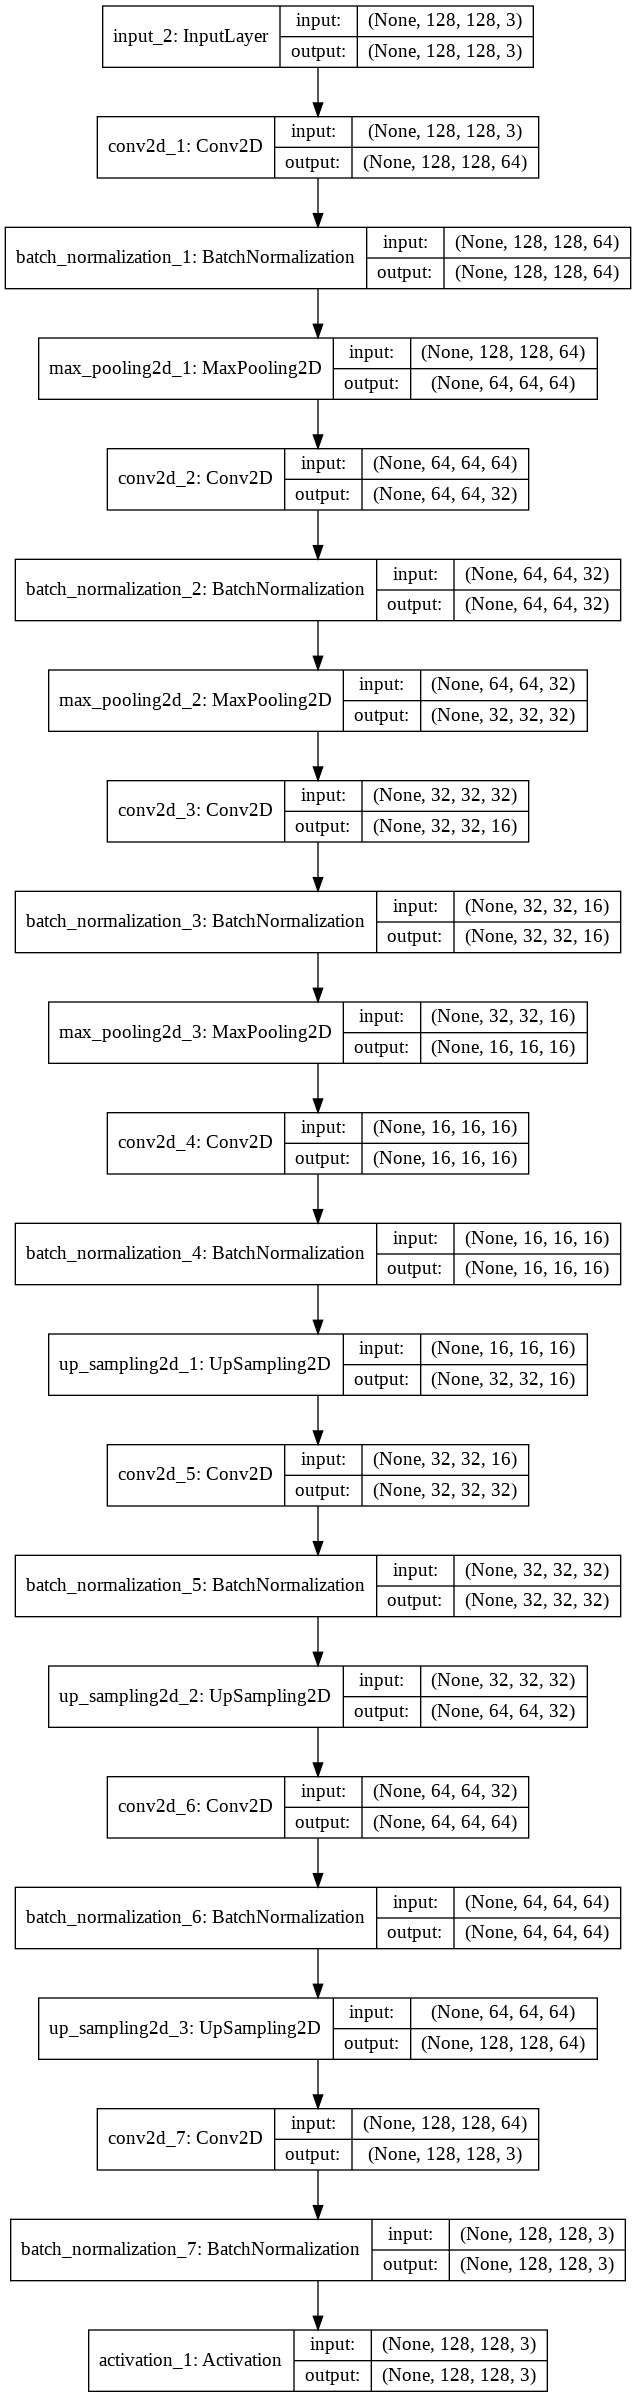

In [29]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

After training is complete, we can visualize the training and validation learning curves (error over epoch). As you can see, the loss of training dataset decreases while the loss of validation dataset increases as epoch grows, this can be considered as an unrepresentative situation that may not capture the statistical characteristics relative to another dataset drawn from the same domain. We think that the reason why it happens is that the validation dataset is too small compared to the training dataset.

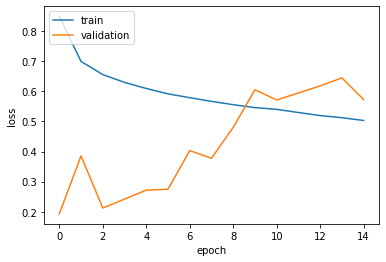

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Dice coefficient measures the similarity two sets of images, If the two sets are identical, the coefficient is equal to 1.0, while if X and Y have no elements in common, it is equal to 0.0. Here, we computed dice coefficient metric on predicted segmentation and actual segmentation, the result is somewhere between 0.45 to 0.6. Next, we plot several segmented test images for visualization purposes.

In [31]:
def dice(im1, im2):
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)
    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")
    intersection = np.logical_and(im1, im2)
    return 2. * intersection.sum() / (im1.sum() + im2.sum())

y_test_predict = model.predict(X_test)

y_test_pred = []
for i in range(len(y_test_predict)):
  y_test_pred_i = cv2.cvtColor(y_test_predict[i], cv2.COLOR_BGR2GRAY)
  y_test_pred_i =  255*((y_test_pred_i<=0.5).astype('uint8'))
  y_test_pred_i = cv2.cvtColor(y_test_pred_i, cv2.COLOR_GRAY2BGR)
  y_test_pred.append(y_test_pred_i)


List = []
for i in range(len(y_test_predict)):
  List.append(dice(y_test_pred[i], y_test[i]))
print("Dice score is:", np.mean(List))

Dice score is: 0.5324925128133724


Then, we applied our trained model to the test dataset, and the plotted results do not seem as good as the actual segmentation image, but they are still acceptable. You can see from the graph that predicated images at least give a general shape of objects, which kind of matching with DIce score indicated above. 

Since the result of the trained model can be varied every time, here is a good one I saved for demonstration
![alt text](https://drive.google.com/uc?export=download&id=10fj2OyXPg1JQZLG7hU-rdF9o7q5vydxr)

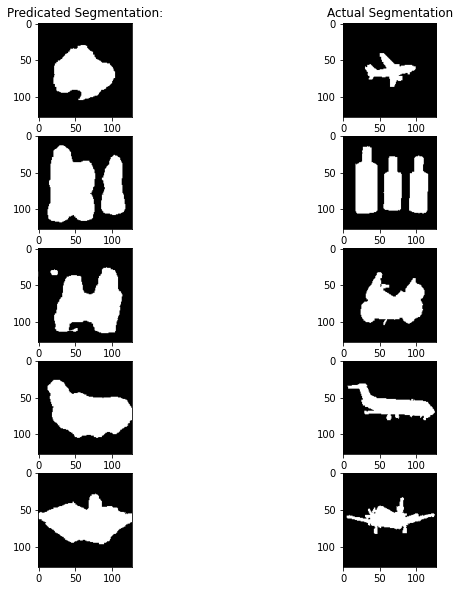

In [32]:
fig, axs1 = plt.subplots(5, 2,figsize=(10,10))

axs1[0,0].imshow(y_test_pred[57])
axs1[0, 0].set_title('Predicated Segmentation:')

axs1[0,1].imshow(y_test[57])
axs1[0,1].set_title('Actual Segmentation')


axs1[1,0].imshow(y_test_pred[67])
axs1[1,1].imshow(y_test[67])

axs1[2,0].imshow(y_test_pred[241])
axs1[2,1].imshow(y_test[241])

axs1[3,0].imshow(y_test_pred[189])
axs1[3,1].imshow(y_test[189])

axs1[4,0].imshow(y_test_pred[222])
axs1[4,1].imshow(y_test[222])

Finally, we save the weights of our trained model into .h5 file:

In [0]:
#model.save_weights("seg_model1.h5")
#from google.colab import files
#files.download("seg_model1.h5") 

### 4.2 Segmentation on Processed Dataset

Rather than only focusing on segmentation using the raw dataset, in this part, with the computation power of GPU and good deep learning models like VGG16, we decided to perform category-level segmentation on processed dataset. However, this means our dataset needs to be rebuilt and for computational efficiency we have to also choose only partial data for this task as the aim of this project is to understand the model and concepts.

Here we used a [Python script](https://drive.google.com/uc?export=download&id=1iKZVA3oRKcwhduLWP6sjgICFn1XzX4MK) to extract data from the original dataset and performed proprocessing and augmentations on them. There were four classes selected for this task, besides '*background*' ([0, 0, 0]), we also picked '*aeroplane*' ([128, 0, 0]), '*person*' ([192, 128, 128]), '*bicycle*' ([0, 128, 0]) and '*chair*' ([192, 0, 0]). Firstly, tuple with features `np.ndarray` of shape `(n_images, IMAGE_SIZE, IMAGE_SIZE, 3)` and labels `np.ndarray` of shape `(n_images, IMAGE_SIZE, IMAGE_SIZE, 3)` will be returned as the result of building training or validation set for the segmentation task.


Next, we converted the data into numpy array and resize the images to `(IMAGE_SIZE, IMAGE_SIZE)`, in this case, `IMAGE_SIZE=128`. The following step is augmentation.

The reason we performed augmentation is that augmentation helps to **prevent memorisation of training data and helps the network's performance on data from outside the training set**. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks. During this task we focused on **random shift scale rotate** and **random horizontal flip**, we assign random augmentations on the given image, mask and label, returns randomly shifted, scaled and rotated image, mask and label. 

Now we download the processed dataset from our cloud storage. As the augmentation and dataset construction takes more than 20 mins so we reckon this might be the most convenient way.

In [34]:
from urllib.request import urlretrieve
from zipfile import ZipFile
import tarfile
from urllib import request

our_face_dataset_url = "https://drive.google.com/uc?export=download&id=1OQuFctHAZQJWaBHvWoFzuFtYBeFHqBR-"

# define download function
def download(url, file):
    if not os.path.isfile(file):
        print("Download file... " + file + " ...")
        urlretrieve(url,file)
        print("File downloaded")

download(our_face_dataset_url,'/content/sample_data/segmentation.zip')
print("All the files are downloaded")

Download file... /content/sample_data/segmentation.zip ...
File downloaded
All the files are downloaded


In [0]:
# Here the downloaded file is a zip file so we use the function below to unzip it
def uncompress_features_labels(dir):
    if(os.path.isdir('data')):
        print('Data extracted')
    else:
        with ZipFile(dir) as zipf:
            zipf.extractall('data')

uncompress_features_labels('/content/sample_data/segmentation.zip')

We used the images given in the `JPEGImages` folder as input, and the labels (ground truth segmentations) given in the `SegmentationClass` folder. Now we read the original images and augmented images into the numpy arrays for future use:

In [0]:
PATH_TO_SEGMENTATION = "/content/data/segmentation/"
IMAGE_SIZE = 128
NUM_CLASSES = 4

def read_images(filenames, subfolder):
    images = []
    for i in range(0, len(filenames)):
        img_path = PATH_TO_SEGMENTATION + subfolder + "/img" + str(i) + ".jpg"
        images.append(resize(io.imread(img_path), (IMAGE_SIZE, IMAGE_SIZE, 3)))
    return np.array(images).astype('float32')


filenames_train = [img for img in glob.glob(PATH_TO_SEGMENTATION + "train/*.jpg")]
filenames_train_labels = [img for img in glob.glob(PATH_TO_SEGMENTATION + "train-labels/*.jpg")]
filenames_validation = [img for img in glob.glob(PATH_TO_SEGMENTATION + "validation/*.jpg")]
filenames_validation_labels = [img for img in glob.glob(PATH_TO_SEGMENTATION + "validation-labels/*.jpg")]
filenames_test = [img for img in glob.glob(PATH_TO_SEGMENTATION + "test/*.jpg")]
filenames_test_labels = [img for img in glob.glob(PATH_TO_SEGMENTATION + "test-labels/*.jpg")]

train_features_resized = read_images(filenames_train, "train")
train_segmentations_resized = read_images(filenames_train_labels, "train-labels")

validation_features_resized = read_images(filenames_validation, "validation")
validation_segmentations_resized = read_images(filenames_validation_labels, "validation-labels")

test_features_resized = read_images(filenames_test, "test")
test_segmentations_resized = read_images(filenames_test_labels, "test-labels")

#print(train_features_resized.shape)
#print(train_segmentations_resized.shape)
#print(validation_features_resized.shape)
#print(validation_segmentations_resized.shape)
#print(test_features_resized.shape)
#print(test_segmentations_resized.shape)

num_classes = train_features_resized.shape[3]

In [0]:
filenames_train_augmented = [img for img in glob.glob(PATH_TO_SEGMENTATION + "augmented_images/train/*.jpg")]
filenames_train_labels_augmented = [img for img in glob.glob(PATH_TO_SEGMENTATION + "augmented_images/train-labels/*.jpg")]
filenames_validation_augmented = [img for img in glob.glob(PATH_TO_SEGMENTATION + "augmented_images/validation/*.jpg")]
filenames_validation_labels_augmented = [img for img in glob.glob(PATH_TO_SEGMENTATION + "augmented_images/validation-labels/*.jpg")]
filenames_test_augmented = [img for img in glob.glob(PATH_TO_SEGMENTATION + "augmented_images/test/*.jpg")]
filenames_test_labels_augmented = [img for img in glob.glob(PATH_TO_SEGMENTATION + "augmented_images/test-labels/*.jpg")]


train_features_resized_augmented = read_images(filenames_train_augmented, "augmented_images/train")
train_segmentations_resized_augmented = read_images(filenames_train_labels_augmented, "augmented_images/train-labels")

validation_features_resized_augmented = read_images(filenames_validation_augmented, "augmented_images/validation")
validation_segmentations_resized_augmented = read_images(filenames_validation_labels_augmented, "augmented_images/validation-labels")

test_features_resized_augmented = read_images(filenames_test_augmented, "augmented_images/test")
test_segmentations_resized_augmented = read_images(filenames_test_labels_augmented, "augmented_images/test-labels")

#print(train_features_resized_augmented.shape)
#print(train_segmentations_resized_augmented.shape)
#print(validation_features_resized_augmented.shape)
#print(validation_segmentations_resized_augmented.shape)
#print(test_features_resized_augmented.shape)
#print(test_segmentations_resized_augmented.shape)

We plot a few images from our constructed dataset, original and augmented.

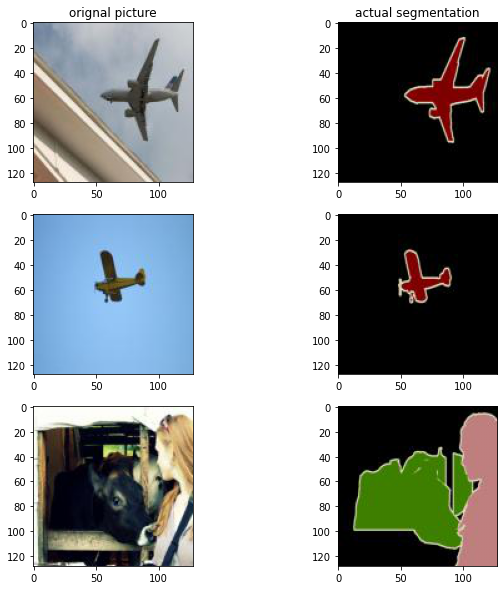

In [38]:
fig, axs = plt.subplots(3, 2,figsize=(10,10))
axs[0,0].imshow(train_features_resized[6])
axs[0, 0].set_title('orignal picture')
axs[0,1].imshow(train_segmentations_resized[6])
axs[0, 1].set_title('actual segmentation')
axs[1,0].imshow(validation_features_resized[6])
axs[1,1].imshow(validation_segmentations_resized[6])
axs[2,0].imshow(test_features_resized[6])
axs[2,1].imshow(test_segmentations_resized[6])

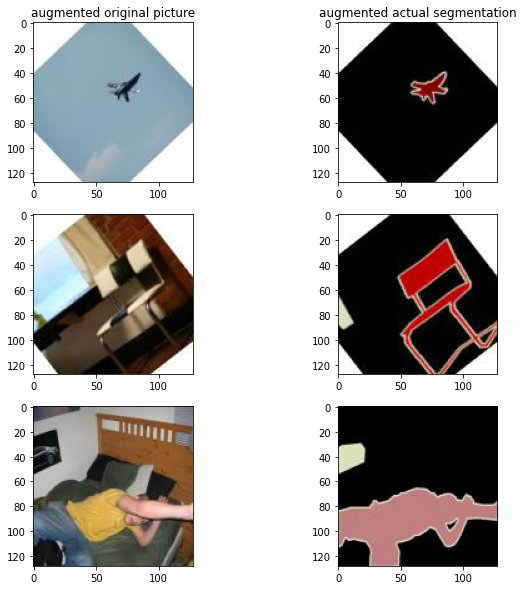

In [39]:
fig, axs = plt.subplots(3, 2,figsize=(10,10))
axs[0,0].imshow(train_features_resized_augmented[6])
axs[0, 0].set_title('augmented original picture')
axs[0,1].imshow(train_segmentations_resized_augmented[6])
axs[0,1].set_title('augmented actual segmentation')
axs[1,0].imshow(validation_features_resized_augmented[6])
axs[1,1].imshow(validation_segmentations_resized_augmented[6])
axs[2,0].imshow(test_features_resized_augmented[6])
axs[2,1].imshow(test_segmentations_resized_augmented[6])

Read the processed labels with shape (height, width, number_classes)

In [40]:
train_seg_labels = np.load(PATH_TO_SEGMENTATION + 'processed_labels/train.npy')
val_seg_labels = np.load(PATH_TO_SEGMENTATION + 'processed_labels/validation.npy')
test_seg_labels = np.load(PATH_TO_SEGMENTATION + 'processed_labels/test.npy')

#print(len(train_seg_labels))
#print(len(val_seg_labels))
#print(len(test_seg_labels))

#Should be (img_size, img_size, num_classes) - in this case 128 128 4
print(train_seg_labels[0].shape)
print(val_seg_labels[0].shape)
print(test_seg_labels[0].shape)

(128, 128, 4)
(128, 128, 4)
(128, 128, 4)


In [41]:
train_seg_labels_augmented = np.load(PATH_TO_SEGMENTATION + 'augmented_images/processed_labels/train.npy')
val_seg_labels_augmented = np.load(PATH_TO_SEGMENTATION + 'augmented_images/processed_labels/validation.npy')
test_seg_labels_augmented = np.load(PATH_TO_SEGMENTATION + 'augmented_images/processed_labels/test.npy')

#print(len(train_seg_labels_augmented))
#print(len(val_seg_labels_augmented))
#print(len(test_seg_labels_augmented))

#Should be (img_size, img_size, num_classes) - in this case 128 128 4
print(train_seg_labels_augmented[0].shape)
print(val_seg_labels_augmented[0].shape)
print(test_seg_labels_augmented[0].shape)

(128, 128, 4)
(128, 128, 4)
(128, 128, 4)


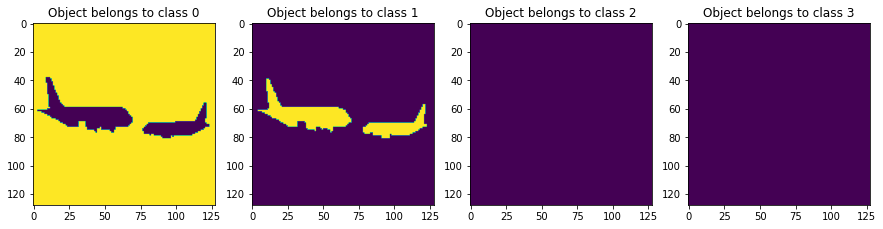

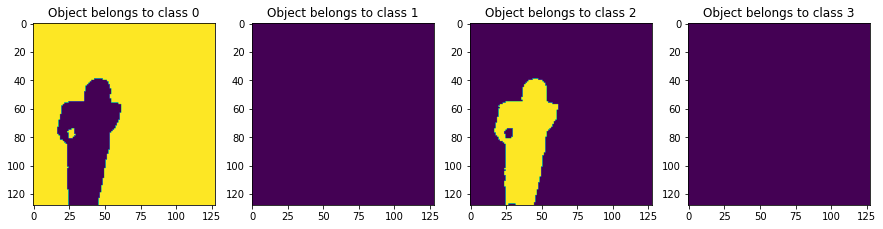

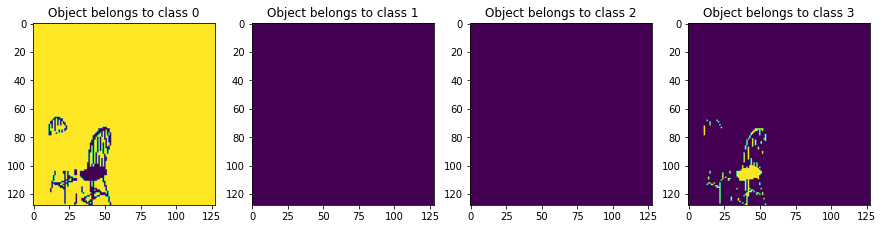

In [42]:
# Plot segmentations
n_classes = 4
def plot_segmentation(idx):
    img = train_seg_labels[idx]
    mi, ma = 0, n_classes-1
    n_classes_plot = n_classes
    fig = plt.figure(figsize=(15,10))
    for k in range(mi, ma+1):
        ax = fig.add_subplot(1, n_classes_plot, k+1)
        ax.imshow((img[:, :, k]))
        ax.set_title("Object belongs to class {}".format(k))
        
plot_segmentation(2)
plot_segmentation(30)
plot_segmentation(110)

We notived that the background channel is channel number 0. To obtain the label for each image data, we need to get the label in the corresponding class. First the non-augmented then the augmented dataset.

In [0]:
background_channel = 0

train_seg_labels_binary = [(~train_seg_label[:, :, background_channel].astype(bool)).astype(int)[..., np.newaxis] for train_seg_label in train_seg_labels]
val_seg_labels_binary =  [(~val_seg_label[:, :, background_channel].astype(bool)).astype(int)[..., np.newaxis] for val_seg_label in val_seg_labels]
test_seg_labels_binary =  [(~test_seg_label[:, :, background_channel].astype(bool)).astype(int)[..., np.newaxis] for test_seg_label in test_seg_labels]

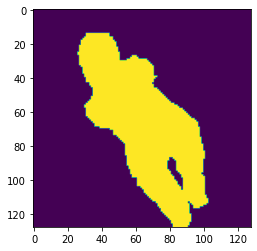

In [44]:
plt.imshow(train_seg_labels_binary[40].reshape(IMAGE_SIZE,IMAGE_SIZE))

In [0]:
background_channel = 0

train_seg_labels_augmented_binary = [(~train_seg_label_aug[:, :, background_channel].astype(bool)).astype(int)[..., np.newaxis] for train_seg_label_aug in train_seg_labels_augmented]
val_seg_labels_augmented_binary =  [(~val_seg_label_aug[:, :, background_channel].astype(bool)).astype(int)[..., np.newaxis] for val_seg_label_aug in val_seg_labels_augmented]
test_seg_labels_augmented_binary =  [(~test_seg_label_aug[:, :, background_channel].astype(bool)).astype(int)[..., np.newaxis] for test_seg_label_aug in test_seg_labels_augmented]
#plt.imshow(train_seg_labels_augmented_binary[].reshape(IMAGE_SIZE,IMAGE_SIZE))

#### 4.2.1 Build from Scratch (U-Net)

Firstly, we built a scratch model based on U-Net to predict each pixel as foreground or background (binary classification per pixel).

The architecture contains two part:

* The first part (contraction path) of this network may be thought of as an encoder where convolution and maxpooling operations are applied to encode the input image into feature representations at multiple levels, which capture the context of images. 

* The second part (symmetric expanding path)corresponds to a decoder that is used to enable precise localization using transposed convolutions.

The basic U-Net architecture is shown below as Ronneberger et al. (2018) described in their original paper.
![alt text](https://i.imgur.com/hNcR2VT.png)

Detailed steps are displayed below:
![alt text](https://miro.medium.com/max/2000/1*yzbjioOqZDYbO6yHMVpXVQ.jpeg)

In [46]:
X_train = train_features_resized
y_train = np.array(train_seg_labels_binary)

X_val = validation_features_resized
y_val = np.array(val_seg_labels_binary)


X_test = test_features_resized
y_test = np.array(test_seg_labels_binary)

X_train_aug = train_features_resized_augmented
y_train_aug = np.array(train_seg_labels_augmented_binary)

X_val_aug = validation_features_resized_augmented
y_val_aug = np.array(val_seg_labels_augmented_binary)

X_train_full =  np.concatenate((X_train,X_train_aug), axis = 0)
y_train_full = np.concatenate((y_train, y_train_aug), axis = 0)

X_val_full = np.concatenate((X_val, X_val_aug), axis=0)
y_val_full = np.concatenate((y_val, y_val_aug), axis = 0)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)
print(X_train_full.shape, y_train_full.shape)
print(X_val_full.shape, y_val_full.shape)

(132, 128, 128, 3) (132, 128, 128, 1)
(97, 128, 128, 3) (97, 128, 128, 1)
(25, 128, 128, 3) (25, 128, 128, 1)
(792, 128, 128, 3) (792, 128, 128, 1)
(582, 128, 128, 3) (582, 128, 128, 1)


In [0]:
def unet(pretrained_weights = None, input_size = (128, 128, 3)):
  
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    adam = Adam(lr = 1e-4)
    sgd = optimizers.SGD(lr=1e-4, decay=5**(-4), momentum=0.9, nesterov=True)
    rms_prop = optimizers.rmsprop(lr=1e-4)

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    model.compile(optimizer=adam, loss = 'binary_crossentropy', metrics = ['accuracy'])  

    return model

Here we download our saved weights for U-Net:

In [48]:
!wget https://dl.dropboxusercontent.com/s/0oyh6dm1gpxjza0/unet.h5
unet_weights_path='/content/unet.h5'

--2020-06-01 11:11:59--  https://dl.dropboxusercontent.com/s/0oyh6dm1gpxjza0/unet.h5
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.5.6, 2620:100:601d:6::a27d:506
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.5.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124220352 (118M) [text/plain]
Saving to: ‘unet.h5’

unet.h5             100%[===================>] 118.46M  47.8MB/s    in 2.5s    

2020-06-01 11:12:03 (47.8 MB/s) - ‘unet.h5’ saved [124220352/124220352]



Now start training:

In [49]:
np.random.seed(1337) # for reproducibility

#you can uncomment the first unet_model command to load the pretrained weights

#unet_model = unet(pretrained_weights=unet_weights_path, input_size = (128, 128, 3))
unet_model = unet(input_size = (128, 128, 3))
hist_unet = unet_model.fit(X_train_full,y_train_full,
                  validation_data=(X_val_full, y_val_full),
                  batch_size=24, epochs=15, verbose=1)

Train on 792 samples, validate on 582 samples
Epoch 1/15
792/792 [==============================] - 13s 16ms/step - loss: 0.4219 - accuracy: 0.8582 - val_loss: 0.3418 - val_accuracy: 0.8831
Epoch 2/15
792/792 [==============================] - 10s 12ms/step - loss: 0.3563 - accuracy: 0.8758 - val_loss: 0.3423 - val_accuracy: 0.8832
Epoch 3/15
792/792 [==============================] - 10s 12ms/step - loss: 0.3448 - accuracy: 0.8759 - val_loss: 0.3727 - val_accuracy: 0.8833
Epoch 4/15
792/792 [==============================] - 10s 12ms/step - loss: 0.3339 - accuracy: 0.8760 - val_loss: 0.3437 - val_accuracy: 0.8833
Epoch 5/15
792/792 [==============================] - 10s 12ms/step - loss: 0.3179 - accuracy: 0.8760 - val_loss: 0.3304 - val_accuracy: 0.8833
Epoch 6/15
792/792 [==============================] - 10s 12ms/step - loss: 0.3100 - accuracy: 0.8760 - val_loss: 0.3347 - val_accuracy: 0.8833
Epoch 7/15
792/792 [==============================] - 10s 12ms/step - loss: 0.3017 - accur

Much more clear architecture:

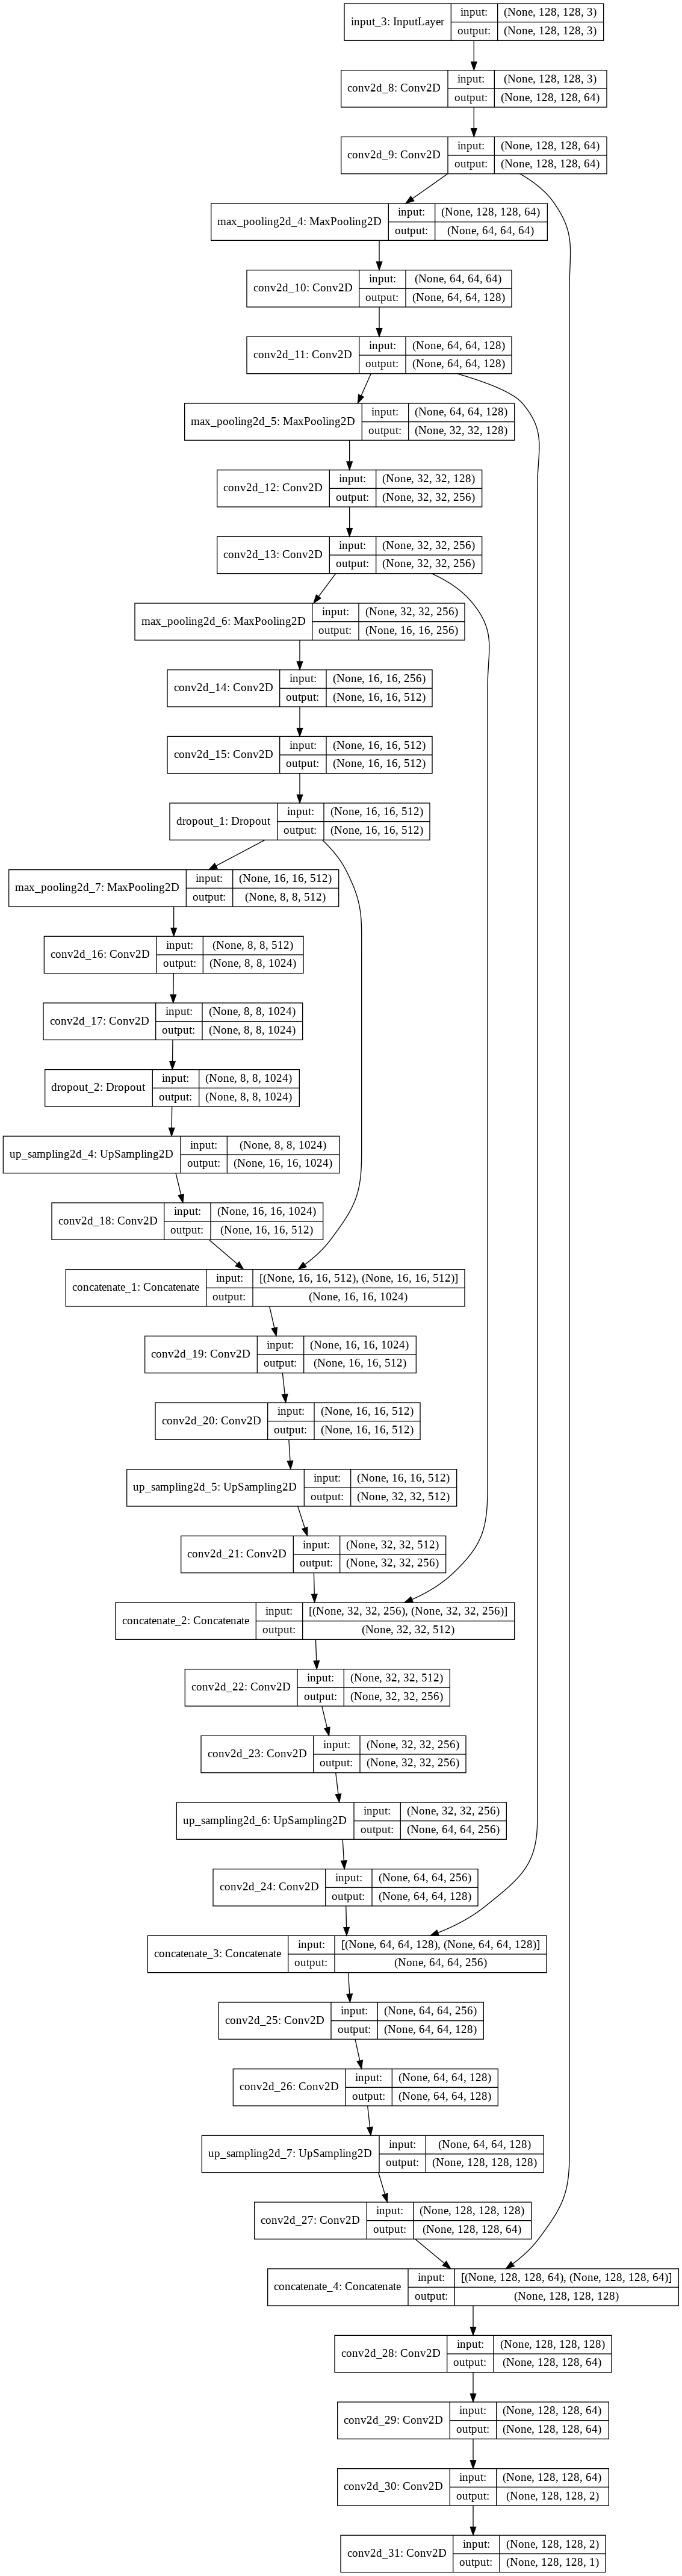

In [50]:
from keras.utils.vis_utils import plot_model
plot_model(unet_model, show_shapes=True, show_layer_names=True)

We plot the training and validation loss function. As you can see from the graph, this is a good fit learning curve since validation loss decreases to a point of stability and has a small gap with the training loss. The validation loss often start to raise after the 9th epoch which potentially indicates overfitting.

![alt text](https://dl.dropboxusercontent.com/s/gzd1ptomyx5iyrb/download.png)

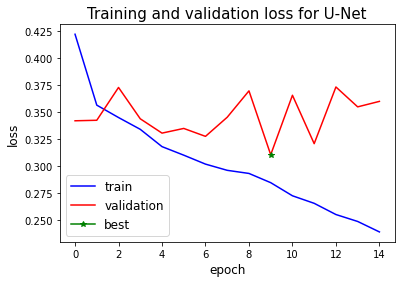

In [51]:
# Plotting the training and validation loss function, used to determine overfitting

plt.plot(hist_unet.history['loss'], label='train', color='blue')
plt.plot(hist_unet.history['val_loss'], label='validation', color='red')
plt.plot(np.argmin(hist_unet.history["val_loss"]), np.min(hist_unet.history["val_loss"]), marker="*", color="g", label="best")
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.title('Training and validation loss for U-Net', fontsize=15)
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()

For loss function, here we use **Sørensen–Dice coefficient (F1 score)**.

The Sørensen–Dice coefficient is a statistic used to gauge the similarity of two samples. Simply put, the Dice Coefficient is 2 * the Area of Overlap divided by the total number of pixels in both images. 

Given two sets, X and Y, it is defined as

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/a80a97215e1afc0b222e604af1b2099dc9363d3b)

where |X| and |Y| are the cardinalities of the two sets (i.e. the number of elements in each set). The Sørensen index equals twice the number of elements common to both sets divided by the sum of the number of elements in each set.

Now we compute Sørensen–Dice coefficient for the predictions of the test data:

In [0]:
def dice(im1, im2):
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)
    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")
    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)
    return 2. * intersection.sum() / (im1.sum() + im2.sum())

In [53]:
y_pred_unet = unet_model.predict(X_test)
y_pred_boolean_unet = [np.where(img > 0.3, 1, 0) for img in y_pred_unet]

dice_coefficients = []
for i in range(len(y_pred_boolean_unet)):
  dice_coefficients.append(dice(y_pred_boolean_unet[i], y_test[i]))

np.mean(dice_coefficients)

0.3543429119827132

Now we plot the segmentations obtained from the network and compare them with the ground truth segmentations. As you can tell from the graph, predicated results do not look very good compared to actual segmentations, however, the shapes and locations were roughly captured which can still be considered satisfactory. We noticed that it is still very hard to pick up a clear structure of a complex object such as a person especially multiple objects appearing together. The result we obtained is shown below:

We had a dice score in between 0.28 to 0.39 which is not too bad.

![alt text](https://dl.dropboxusercontent.com/s/lmalrtq60cy6u9a/resultunet.png)





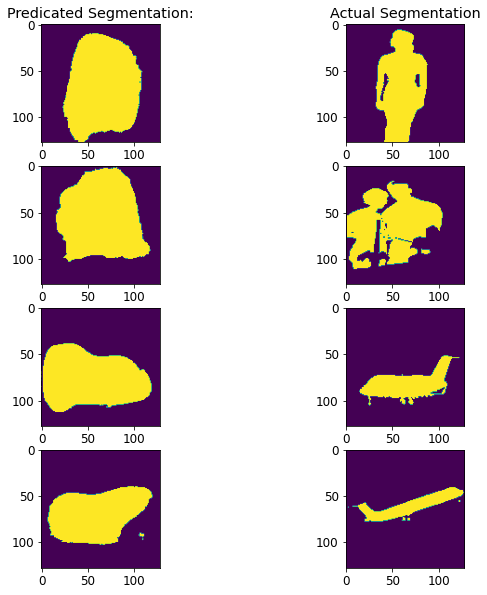

In [54]:
fig, axs2 = plt.subplots(4, 2, figsize=(10,10))

axs2[0,0].imshow(y_pred_boolean_unet[2].reshape(IMAGE_SIZE,IMAGE_SIZE))
axs2[0,0].set_title('Predicated Segmentation:')

axs2[0,1].imshow(y_test[2].reshape(IMAGE_SIZE,IMAGE_SIZE))
axs2[0,1].set_title('Actual Segmentation')

axs2[1,0].imshow(y_pred_boolean_unet[9].reshape(IMAGE_SIZE,IMAGE_SIZE))
axs2[1,1].imshow(y_test[9].reshape(IMAGE_SIZE,IMAGE_SIZE))

axs2[2,0].imshow(y_pred_boolean_unet[12].reshape(IMAGE_SIZE,IMAGE_SIZE))
axs2[2,1].imshow(y_test[12].reshape(IMAGE_SIZE,IMAGE_SIZE))

axs2[3,0].imshow(y_pred_boolean_unet[15].reshape(IMAGE_SIZE,IMAGE_SIZE))
axs2[3,1].imshow(y_test[15].reshape(IMAGE_SIZE,IMAGE_SIZE))

Finally we save the model weights as .h5 file.

In [0]:
#unet_model.save_weights("unet.h5")
#from google.colab import files
#files.download('/content/unet.h5')

#### 4.2.2 Transfer learning (FCN-32s based on VGG weights)

The next model we used is FCN-32s to predict the class of each of the pixels (aeroplane, person, chair, motobike or background). Fully convolutional networks are composed of convolutional layers without any fully-connected layers. The output of the network has the same spatial size as the input image (width and height) with a channel depth equivalent to the number of possible classes to be predicted.

**Fully Convolutional Networks** (FCNs) owe their name to their architecture, which is built only from locally connected layers, such as convolution, pooling and upsampling. Note that no dense layer is used in this kind of architecture. This reduces the number of parameters and computation time. Also, the network can work regardless of the original image size, without requiring any fixed number of units at any stage, givent that all connections are local. To obtain a segmentation map (output), segmentation networks usually have 2 parts :

* Downsampling path : capture semantic/contextual information
* Upsampling path : recover spatial information

The **downsampling path** is used to extract and interpret the context (what), while the upsampling path is used to enable precise localization (where). Furthermore, to fully recover the fine-grained spatial information lost in the pooling or downsampling layers, we often use skip connections.

A **skip connection** is a connection that bypasses at least one layer. Here, it is often used to transfer local information by concatenating or summing feature maps from the downsampling path with feature maps from the upsampling path. Merging features from various resolution levels helps combining context information with spatial information.
![alt text](http://deeplearning.net/tutorial/_images/cat_segmentation.png)

There are variants of the FCN architecture, which mainly differ in the spatial precision of their output. For example, the figures below show the FCN-32, FCN-16 and FCN-8 variants. In the figures, convolutional layers are represented as vertical lines between pooling layers, which explicitely show the relative size of the feature maps.
![alt text](http://deeplearning.net/tutorial/_images/fcn.png)

Here we adopted FCN-32, which directly produces the segmentation map from conv7, by using a transposed convolution layer with stride 32.


![alt text](http://deeplearning.net/tutorial/_images/fcn_schema.png)

References:
* Long, J., Shelhamer, E., Darrell, T. Fully Convolutional Networks for Semantic Segmentation. 2014.
* David Vázquez, Jorge Bernal, F. Javier Sánchez, Gloria Fernández-Esparrach, Antonio M. López, Adriana Romero, Michal Drozdzal, Aaron Courville. A Benchmark for Endoluminal Scene Segmentation of Colonoscopy Images. (2016).
* Francesco Visin, Adriana Romero - Dataset loaders: a python library to load and preprocess datasets. 2017.


In [0]:
# fetch VGG weights
#VGG_Weights_path = PATH_TO_SEGMENTATION + "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [57]:
# dataset for FCN-32s
X_train = train_features_resized
y_train = np.array(train_seg_labels)

X_val = validation_features_resized
y_val = np.array(val_seg_labels)

X_test = test_features_resized
y_test = np.array(test_seg_labels)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(132, 128, 128, 3) (132, 128, 128, 4)
(97, 128, 128, 3) (97, 128, 128, 4)
(25, 128, 128, 3) (25, 128, 128, 4)


In [0]:
np.random.seed(1337) # for reproducibility
smooth = 1
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

# Bilinear interpolation (reference: https://github.com/warmspringwinds/tf-image-segmentation/blob/master/tf_image_segmentation/utils/upsampling.py)
def bilinear_upsample_weights(factor, number_of_classes):
    filter_size = factor*2 - factor%2
    factor = (filter_size + 1) // 2
    if filter_size % 2 == 1:
        center = factor - 1
    else:
        center = factor - 0.5
    og = np.ogrid[:filter_size, :filter_size]
    upsample_kernel = (1 - abs(og[0] - center) / factor) * (1 - abs(og[1] - center) / factor)
    weights = np.zeros((filter_size, filter_size, number_of_classes, number_of_classes),
                       dtype=np.float32)
    for i in range(number_of_classes):
        weights[:, :, i, i] = upsample_kernel
    return weights

def fcn_32s():
    inputs = Input(shape=(128, 128, 3))
    vgg16 = VGG16(weights='imagenet', include_top=False, input_tensor=inputs)
    x = Conv2D(filters=NUM_CLASSES, kernel_size=(1, 1))(vgg16.output)
    x = Conv2DTranspose(filters=NUM_CLASSES, 
                        kernel_size=(64, 64),
                        strides=(32, 32),
                        padding='same',
                        activation='softmax',
                        kernel_initializer=Constant(bilinear_upsample_weights(32, NUM_CLASSES)))(x)
    model = Model(inputs=inputs, outputs=x)
    return model

In [59]:
np.random.seed(1337) # for reproducibility
fcn_model = fcn_32s()
adam = optimizers.Adam(lr=1e-4)
sgd = optimizers.SGD(lr=1E-4, decay=5**(-4), momentum=0.9, nesterov=True)
rms_prop = optimizers.rmsprop(lr=1e-4)
fcn_model.compile(
              loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])


#es = EarlyStopping(monitor='val_acc', patience=5)

fcn_hist = fcn_model.fit(X_train,y_train,
                  validation_data=(X_val,y_val),
                  #callbacks=[es],
                  batch_size=1, epochs=12, verbose=1)

58892288/58889256 [==============================] - 1s 0us/step
Train on 132 samples, validate on 97 samples
Epoch 1/12
132/132 [==============================] - 4s 30ms/step - loss: 0.5346 - accuracy: 0.8505 - val_loss: 0.4967 - val_accuracy: 0.8699
Epoch 2/12
132/132 [==============================] - 3s 23ms/step - loss: 0.4596 - accuracy: 0.8613 - val_loss: 0.4657 - val_accuracy: 0.8697
Epoch 3/12
132/132 [==============================] - 3s 23ms/step - loss: 0.4218 - accuracy: 0.8679 - val_loss: 0.4821 - val_accuracy: 0.8709
Epoch 4/12
132/132 [==============================] - 3s 23ms/step - loss: 0.3775 - accuracy: 0.8681 - val_loss: 0.4001 - val_accuracy: 0.8740
Epoch 5/12
132/132 [==============================] - 3s 23ms/step - loss: 0.3769 - accuracy: 0.8698 - val_loss: 0.3852 - val_accuracy: 0.8726
Epoch 6/12
132/132 [==============================] - 3s 23ms/step - loss: 0.3360 - accuracy: 0.8752 - val_loss: 0.4207 - val_accuracy: 0.8731
Epoch 7/12
132/132 [============

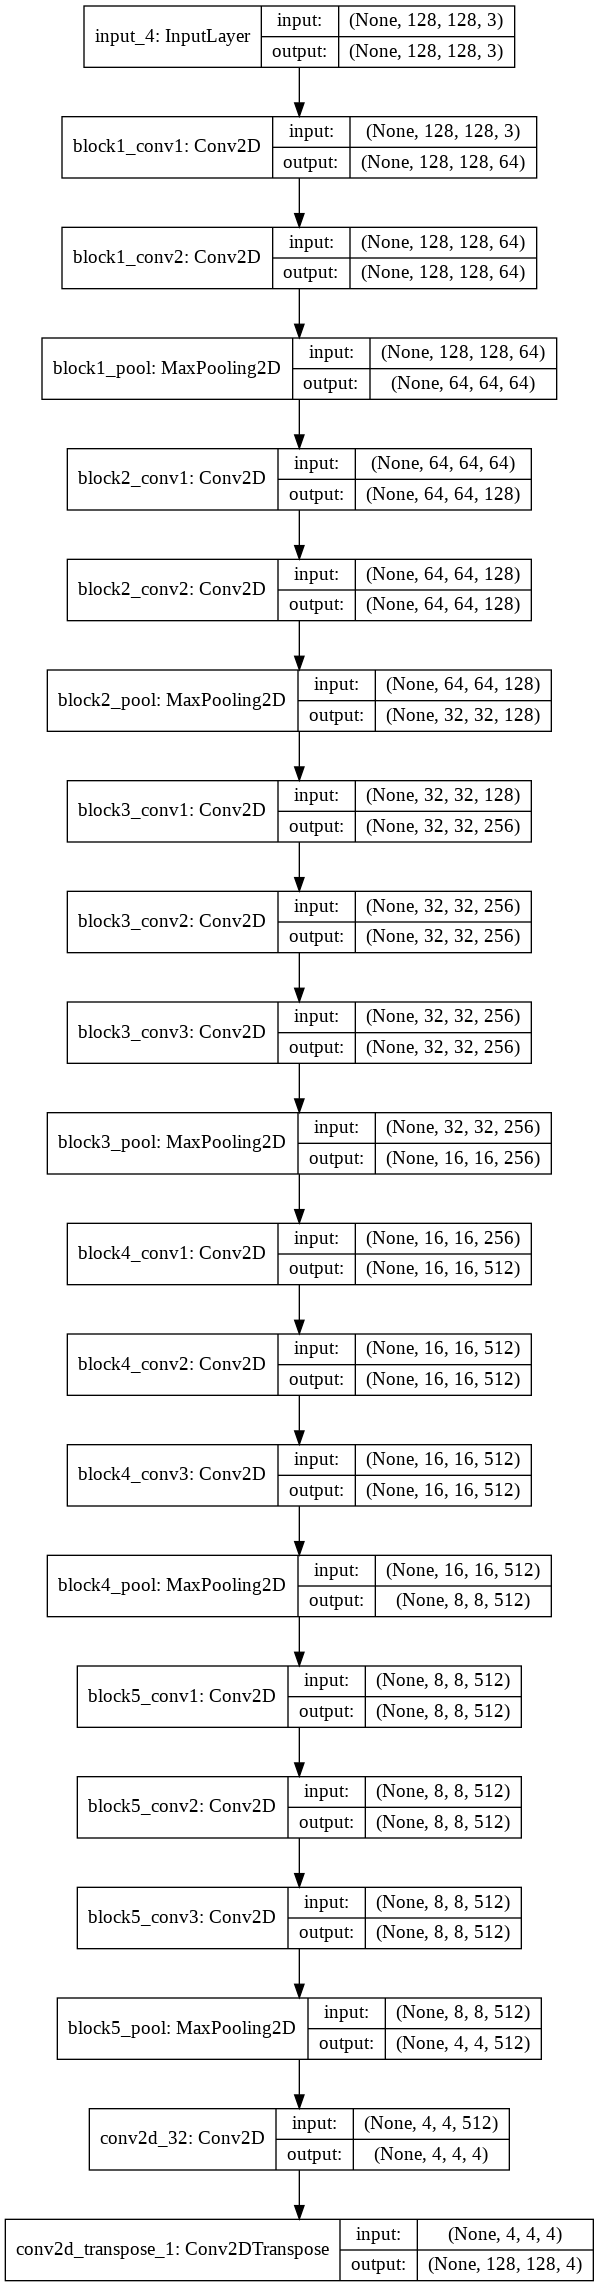

In [60]:
from keras.utils.vis_utils import plot_model
plot_model(fcn_model, show_shapes=True, show_layer_names=True)

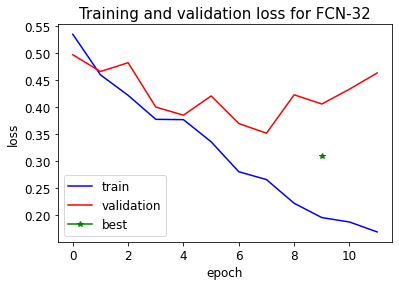

In [61]:
# Plotting the training and validation loss function, used to determine overfitting
plt.plot(fcn_hist.history['loss'], label='train', color='blue')
plt.plot(fcn_hist.history['val_loss'], label='validation', color='red')
plt.plot(np.argmin(hist_unet.history["val_loss"]), np.min(hist_unet.history["val_loss"]), marker="*", color="g", label="best")
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.title('Training and validation loss for FCN-32', fontsize=15)
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()

In [62]:
y_pred = fcn_model.predict(X_test)
y_predi = np.argmax(y_pred, axis=3)
y_testi = np.argmax(y_test, axis=3)
print(y_testi.shape,y_predi.shape)

(25, 128, 128) (25, 128, 128)


We were able to obtain a Dice score in between 0.32 to 0.48 which is satisfactory comparing to the U-Net we used above.

In [63]:
def dice(im1, im2):
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)
    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")
    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)
    return 2. * intersection.sum() / (im1.sum() + im2.sum())
  
  
dice_coefficients = []
for i in range(10):
  dice_coefficients.append(dice(y_predi[i], y_testi[i]))

np.mean(dice_coefficients)

0.31163950349516123

## 5. Adversarial examples

In this section, we will create and train an encoder-decoder CNN which adds pertubation to the our orginial image. The goal of this network is to add small changes to the image in order to trick the pretrained network in predicting another class. Our approach is highly based on the work of P. Yu, K. Song and J. Lu, "Generating Adversarial Examples With Conditional Generative Adversarial Net," 2018 24th International Conference on Pattern Recognition (ICPR), Beijing, 2018.

In this paper an overview is created of different tasks based on adversarial generative CNN's. This includes misclassification with targeted and non-targetted attacks. To limit the influence of the pertubation on the original image, the norm of the pertubation is restricted. This means that each color channel has a maximum value, and all pertubations are rescaled to have this maximum value.

A general overview of the architectuture used is given below and orgiginates from the paper cited above.![alt text](https://github.com/OmidPoursaeed/Generative_Adversarial_Perturbations/raw/master/material/architecture/Image_Dependent.png)

### 5.1 Reloading transfer learning model
We start by reloading the transfer learning model we trained the classification section above.
Next, we freeze the weights of this network to make sure we do not change the weights of this network.

In [0]:
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Precision,Recall
from tensorflow_addons.metrics import F1Score
import tensorflow as tf

resnet_classifier = get_transfer_learning_model()
resnet_classifier.load_weights("transfer_learning.h5")
classification_layer = resnet_classifier.layers[-1].output
binary_classification_layer = tf.gather(classification_layer,[0,2],axis=-1)
model_to_trick = models.Model(resnet_classifier.input,binary_classification_layer)
model_to_trick.trainable = False

### 5.2 Relabeling
We choose to simplify the classification task to a binary classification. The two classes considered are ```aeroplane``` and ```bird```. This was done to keep both the fine tuning of the learning model manageble, as well as the training time. In this cell, we reduce the dataset to only contain images of aeroplanes and birds. In this process, we swap the labels of birds and aeroplanes. Another option would be to do this in the loss function when training the pertubation model. As we are creating a new dataframe anyway we choose to do it here.

In [0]:
def build_bird_aeroplane_from_dict(dictionary):
  filenames = []
  labels = []
  for filename in list(dictionary.keys()):
    if ["bird"] == dictionary[filename]:
      filenames.append(filename+".jpg")
      labels.append("aeroplane")
    elif ["aeroplane"] == dictionary[filename]:
      filenames.append(filename+".jpg")
      labels.append("bird")
  dataframe = pd.DataFrame({"filename":filenames,
                          "class": labels},
                          columns=["filename","class"])
  return dataframe

training_bird_aeroplane_dataframe = build_bird_aeroplane_from_dict(training_dict)
validation_bird_aeroplane_dataframe = build_bird_aeroplane_from_dict(validation_dict)

Next we create the encoder-decoder model. As stated before this is highly based on the implementation of P. Yu, K. Song and J. Lu and corresponds with the ResGan architecture.
The network cosnsists of several convulutional layers which convert the image down to a 256-dimensional vector. On this level severeal resnet-blocks are added to make sure the information of the original image is not lost. As a last step, the pertubated image is rebuild to its orgiginal dimensions.

Special on this implementation of the ResGan network is the rescaling before the 'Add' layer. We rescale the pertubated image to make sure the image is as close as possible to the original image. This is done by specifying the ```max_norm``` parameter. This way, the norm of the pertubation is restricted to the given norm.

In our application we use the inf norm, this means that the maximum value of the pertubation in any color channel will not exceed the value of ```max_norm```.


In [0]:
def resnet_block(prev_layer,filters):
  res_layer1 = layers.Conv2D(filters=filters,kernel_size=(3,3),strides=(1,1),padding="same")(prev_layer)
  relu = layers.ReLU()(res_layer1)
  res_layer2 = layers.Conv2D(filters=filters,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu")(relu)
  return layers.Add()([prev_layer,res_layer2])

#Building a ResNet generator
def get_resnet_generator(max_norm=None,ord=2,batch_size=1):
  input_generator = layers.Input(shape=input_shape)

  #Building the encoder
  conv1 = layers.Conv2D(filters=64,kernel_size=(7,7),strides=(1,1),padding="same",activation="relu")(input_generator)
  conv2 = layers.Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu")(conv1)
  conv3 = layers.Conv2D(filters=256, kernel_size=(3,3),strides=(2,2),padding="same",activation="relu")(conv2)

  #Building the transformer
  res1 = resnet_block(conv3,filters=256)
  res2 = resnet_block(res1,filters=256)
  res3 = resnet_block(res2,filters=256)
  res4 = resnet_block(res3,filters=256)
  res5 = resnet_block(res4,filters=256)
  res6 = resnet_block(res5,filters=256)

  #Building decoder
  deconv1 = layers.Conv2DTranspose(filters=128,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu")(res6)
  deconv2 = layers.Conv2DTranspose(filters=256,kernel_size=(3,3),strides=(2,2),padding="same",activation="relu")(deconv1)
  out = layers.Conv2DTranspose(filters=3,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu")(deconv2)
  

  #Rescaling images
  rescaled_batch = []
  tiling = tf.convert_to_tensor([input_shape[0]])
  orders = [tf.constant([0,1,1],dtype=tf.float32),tf.constant([1,0,1],dtype=tf.float32),tf.constant([1,1,0],dtype=tf.float32)]
  masks = []
  for order in orders:
    masks.append(tf.reshape(tf.tile(tf.tile(order,tiling),tiling), input_shape))

  for i in range(batch_size):
    try:
      rescaled_img = out[i]
      rescaled_img +=1
      rescaled_img *= 127.5
      for ci in range(3):
        mask = masks[ci]
        l_inf = tf.norm(rescaled_img[:,:,ci],ord=ord)
        rescaled_img = rescaled_img * mask + rescaled_img * tf.minimum(tf.cast(1,tf.float32),max_norm / l_inf) * (1 - mask)
      
      rescaled_img /= 127.5
      rescaled_img -= 1
      rescaled_batch.append(rescaled_img)
    except :
      break
  rescale = tf.stack(rescaled_batch)

  #Rescaling images again to forefill the adding functionality (images are rescaled to [0,1])
  adding = layers.Add()([(input_generator + 1) / 2,(rescale + 1) / 2])
  adding *= 2
  adding -= 1
  #Clipping the final image to values interval [-1,1]
  clipping = tf.clip_by_value(adding,-1,1)
  
  return input_generator,clipping,rescale

In [67]:
generator_adversary_training = train_datagen_resnet.flow_from_dataframe(training_bird_aeroplane_dataframe,
                                                    directory="{}/JPEGImages".format(voc_root_folder),
                                                    target_size=(input_shape[0],input_shape[1]),
                                                    batch_size=23,
                                                    class_mode="categorical",classes=["aeroplane","bird"])
generator_adversary_validation = train_datagen_resnet.flow_from_dataframe(validation_bird_aeroplane_dataframe,
                                                    directory="{}/JPEGImages".format(voc_root_folder),
                                                    target_size=(input_shape[0],input_shape[1]),
                                                    batch_size=20,
                                                    class_mode="categorical",classes=["aeroplane","bird"])

Found 414 validated image filenames belonging to 2 classes.
Found 380 validated image filenames belonging to 2 classes.


### 5.3 Training the models
We now train two models to generate pertubations. The first model is trained using the training images of the transfer learning model. The second model is trained using the validation images of the transfer learning model.
Our hypothisis is that the model is more easily fooled by pertubation on the validation images as the model does not 'know' these images. The actual pertubations will probably be more or less the same as the norm of the pertubations is restricted for both models.

In [0]:
input_generator_train, output_generator_train,rescale_train = get_resnet_generator(max_norm=10,ord=np.inf,batch_size=23)
output_train = model_to_trick(output_generator_train)

adversary_model_training = models.Model(input_generator_train,output_train)
adversary_model_training.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1), 
                                loss=BinaryCrossentropy(),
                                metrics=['accuracy'])

In [0]:
input_generator_val, output_generator_val,rescale_val = get_resnet_generator(max_norm=10,ord=np.inf,batch_size=20)
output_val = model_to_trick(output_generator_val)

adversary_model_validation = models.Model(input_generator_val,output_val)
adversary_model_validation.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=1), 
                                loss=BinaryCrossentropy(),
                                metrics=['accuracy'])

In [0]:
# checkpoint_callback_train = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/ComputerVision/adversary_train_norm10_data_reversed.h5',
#                                                           save_weights_only=True,
#                                                           monitor='loss',
#                                                           mode='min',
#                                                           save_best_only=True)

# adversary_model_training.fit(generator_adversary_training,
#                             steps_per_epoch = 18,
#                             batch_size=23,
#                             epochs = 2000,
#                             callbacks=[checkpoint_callback_train])

adversary_model_training.load_weights('adversary_training.h5')

In [0]:
# checkpoint_callback_val = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/ComputerVision/adversary_val_norm10_data_reversed.h5',
#                                                           save_weights_only=False,
#                                                           monitor='loss',
#                                                           mode='min',
#                                                           save_best_only=True)

# adversary_model_validation.fit(generator_adversary_validation,
#                               steps_per_epoch=19,
#                               batch_size=20,
#                               epochs=2000,
#                               callbacks=[checkpoint_callback_val])

adversary_model_validation.load_weights('adversary_validation.h5')

### 5.5 Results of Adversary Training
In this section we examine the results achieved by the adversarial models. We compare the results for both the model trained on the training images, as well as the model trained on the validation images.

We start by defining some helper functions:

In [0]:
from heapq import nlargest
#Helper functions
def get_classes(predictions,threshold=0.5, nmax=None):

  if nmax:
    class_indices = nlargest(nmax,range(len(predictions)),predictions.__getitem__)
  else:
    class_indices = np.nonzero(predictions > threshold)

  predicted_classes = np.take(classes_np, class_indices)
  return predicted_classes.squeeze(0) if nmax == None else predicted_classes

def postprocess(img):
  img_c = np.copy(img)
  img_c += 1
  img_c /= 2
  return img_c

def repeat(img,n):
  new_shape = [n,img.shape[0],img.shape[1],img.shape[2]]
  out = np.zeros(new_shape)
  for i in range(n):
    out[i] = img
  return out

In [0]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def examine_results(img_name,img_class,model_to_trick,full_model,pertubation_model,noise_model,class_indices,batch_size):
  
  fix,ax = plt.subplots(1,4,figsize=(30,6))
  img = img_to_array(load_img("{}/{}".format(img_root, img_name)))
  img_dims = (img.shape[1],img.shape[0])
  img = preprocess(img)
  class_indices = generator_adversary_training.class_indices
  classes_encoded = np.zeros(2)

  for c in class_indices:
    if c == img_class:
      classes_encoded = 1

  ax[0].imshow(postprocess(img))
  img_class = "bird" if img_class == "areoplane" else "areoplane"
  t = ax[0].set_title("Actual classes: {} \n {}".format(img_class, classes_encoded))

  #Predictions of original image
  resized = cv2.resize(img,(224,224))

  predictions_orig = model_to_trick.predict(np.expand_dims(resized,0)).squeeze(0)
  predicted_classes_orig = "aeroplane" if predictions_orig[0] > predictions_orig[1] else "bird"

  ax[1].imshow(postprocess(img))
  t = ax[1].set_title("Predicted classes: {} \n {}".format(predicted_classes_orig, predictions_orig.round(2)))

  #Showing added noise
  noise_rescale = noise_model.predict(repeat(resized,batch_size))[0]
  ax[2].imshow(postprocess(cv2.resize(noise_rescale,img_dims))*5)
  t = ax[2].set_title("Noise added to the image")

  
  #Predictions of pertubated image
  pertubated = pertubation_model.predict(repeat(resized,batch_size))[0]
  predictions_pert = full_model.predict(repeat(resized,batch_size))[0]
  predicted_classes_pert = "aeroplane" if predictions_pert[0] > predictions_pert[1] else "bird"

  ax[3].imshow(postprocess(cv2.resize(pertubated,img_dims)))
  t = ax[3].set_title("Predicted classes: {} \n {}".format(predicted_classes_pert, predictions_pert.round(2)))
  plt.show()

Next, we create the intermediate models to get noise added to the image, as well as the final pertubated image. These models are used to visualize the pertubations below.

In [0]:
#Create the intermediate models which outputs the pertubation of the image
pertubation_model_train = models.Model(input_generator_train,output_generator_train)
noise_model_rescale_train = models.Model(input_generator_train, rescale_train)

pertubation_model_val = models.Model(input_generator_val,output_generator_val)
noise_model_rescale_val = models.Model(input_generator_val, rescale_val)

We examine the output of the generator as well as the noise added to the images. We also examine the predicted classes for the image and their confidence

18/18 [==============================] - 4s 197ms/step - loss: 0.4152 - accuracy: 0.8261
Results of pertubations - Training dataset


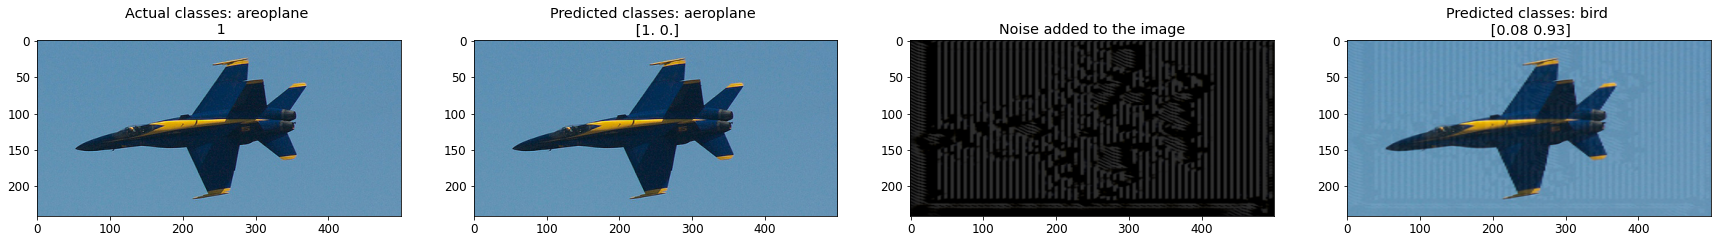

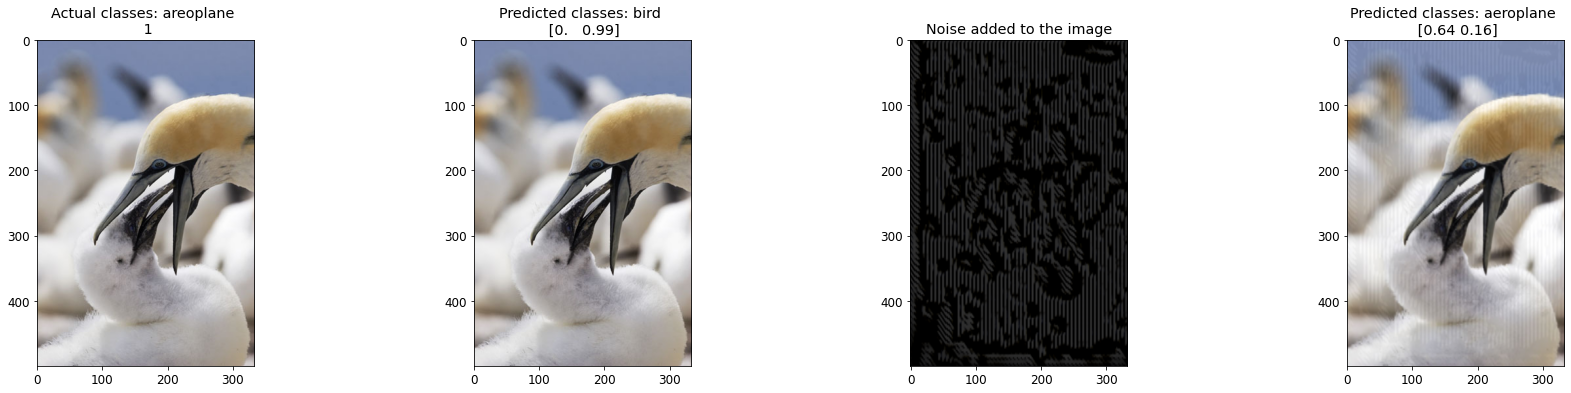

In [75]:
indices = [10,251]
adversary_model_training.evaluate(generator_adversary_training)

print("Results of pertubations - Training dataset")
for idx in indices:
  cidx = generator_adversary_training.class_indices
  img_name, img_classes = training_bird_aeroplane_dataframe.iloc[idx]
  examine_results(img_name,img_classes,model_to_trick,adversary_model_training,pertubation_model_train,noise_model_rescale_train,cidx,23)

Results of pertubations - Validation dataset
19/19 [==============================] - 3s 181ms/step - loss: 0.1173 - accuracy: 0.9658


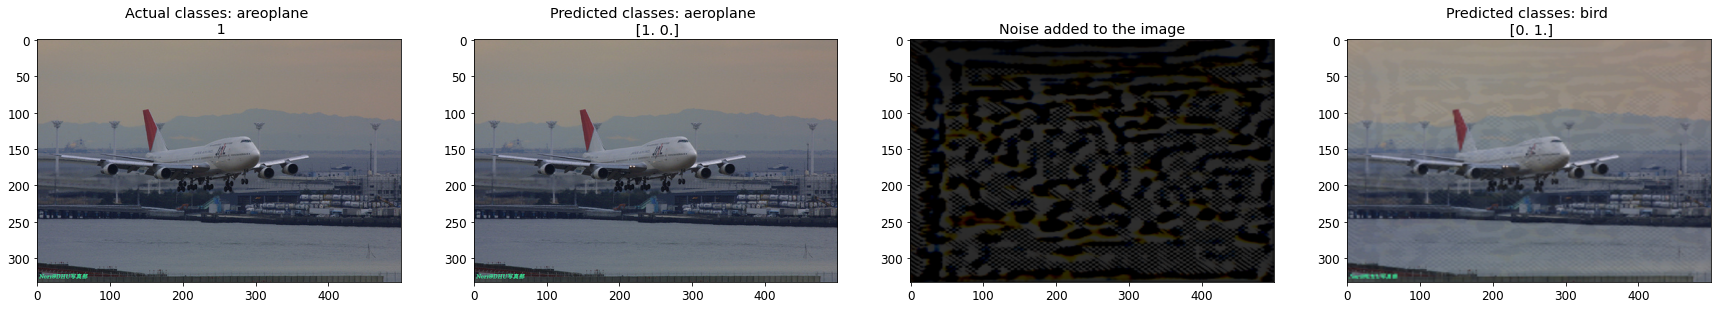

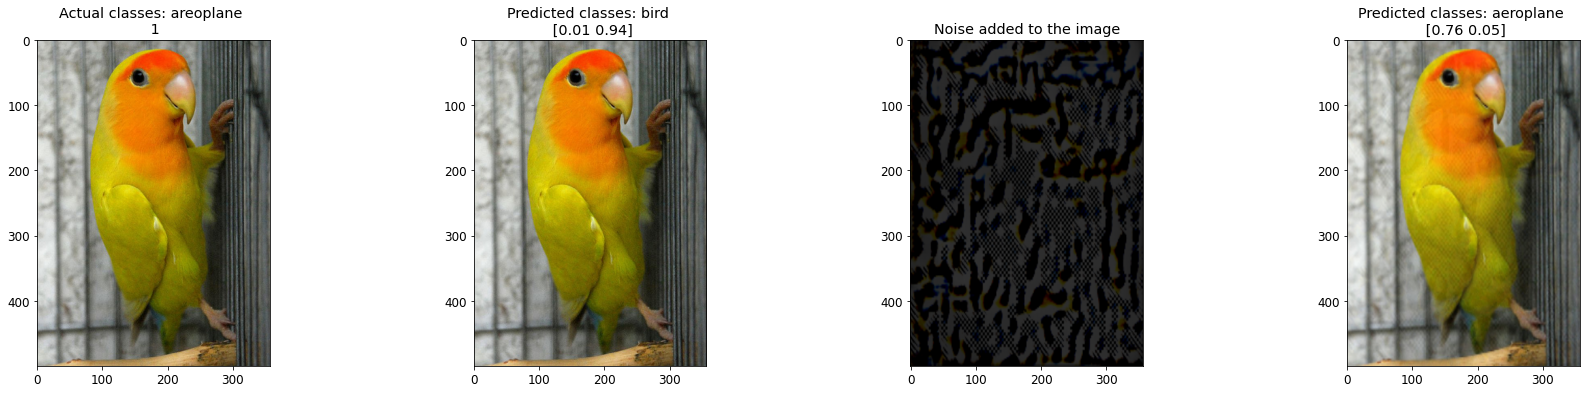

In [76]:
print("Results of pertubations - Validation dataset")
adversary_model_validation.evaluate(generator_adversary_validation)

indices = [30,269]
for idx in indices:
  cidx = generator_adversary_validation.class_indices
  img_name, img_class = validation_bird_aeroplane_dataframe.iloc[idx]
  examine_results(img_name,img_class,model_to_trick,adversary_model_validation,pertubation_model_val,noise_model_rescale_val,cidx,20)

## 6. Discussion

### 6.1 Classification

In the classification part of the assignment, we trained two models: one based on the alexnet architecture and one based on the resnet architecture. This last model was used in a transfer learning setting and thus consists of a pretrained network. 
The results of the classification task were mostly as expected. The transfer learning model did significantly better in both the fit on the training data as well as the inference on unseen images. Furthermore, the transfer learning model required far less computational effort from our part to get the results. The only parameters to be trained are those from the added dense layers. The predictions of the model very quickly converged after only 10 epochs.

The alexnet implementation did far worse than this model. This partly due to the limited time that was available to optimize learning rate and the optimizer itself, as well as the inexperience of all of us to train a CNN from scratch. It became very clear that this is a highly specialized task which is not trivial by any means. The other reason for the rather poor results is that the alexnet architecture is far less advanced than the resnet model. We mainly choose the alexnet architecture as it was very comprehesible and many literature on training and designing them is available. 
This is certainly a part where more time could be spent if given as a more advanced architecture would probably do better than our alexnet implementation. Other options include the VGG family of CNN's. These were specifically not chosen as it they are known to take up large amounts of RAM or VRAM to train and store. These resources are rather limited in the google colab environment.

The main takeaway from this part of the assignment is that for many tasks it suffices to use transfer learning on a specialized pretrained model rather than designing a model from scratch. 


### 6.2 Segmentation

The main idea of image segmentation consists of recognizing objects and assigning each of the pixels of the image to one of the recognized objects or background. In recent years and with the rise of deep learning, fully convolutional neural networks, based in the encoder-decoder architecture, have been used to perform image segmentation. For example, one of the most popular image segmentation networks is the one created by Ronneberger et al., U-Net.

Here we first tested our model on the raw dataset, which was created the same as in the classification part. In this section of the project, a pixel-wise binary segmentation based in the autoencoder's architecture was adopted. For doing so, all the images of the segmentation dataset have been transformed into binary images, distinguishing only between foreground and background and not between objects. 898 images compose the training set in grey-scale with their corresponding segmented images, all of them of size `(128, 128)`, being the rest of the images used as test and validation sets (300 images each).

As the nature of the problem is binary segmentation, it has been decided to test two different loss functions. First, it has been tested the network trained with binary cross-entropy. The problem of binary cross-entropy is that the output is not hard pushed to be binary but to have values between
0 and 1, obtaining a segmentation far from being smooth. Thereby, it has been tested a second loss function based in dice coefficient loss. Dice coefficient loss is used for class imbalance problems, and it has the advantage of obtaining a smoother output by pushing it to be binary. However, the borders of the images are less fine shaped when using this last loss function.

Next, we transformed our dataset using augmentation and selected a few classes our to test two other models: one build-from-scratch (UNet) and one transfer learning (FCN-32). We have also tested both loss functions on these models.

Both loss functions provide desired characteristics in the segmented images. Binary cross-entropy loss function drives the network to detect better the margins of the objects that are being segmented. Dice coefficient loss function drives the network to have a smoother image, filling better the interior of the
segmented objects. 

Besides, we also tried skip connection, which represents the idea of some connections skip deeper layers and are feed as input to the decoder's higher layers. This had been adopted in the architecture of FCN-32. The purpose of this is to use some concepts that were learned in the previous layers for the reconstruction in the upsampling layers.

Generally, the result is acceptable but requires further fine-tuning. We believe that these architectures are sufficient enough to produce good segmentations but require extra energy on tuning the parameters for the best outcome.

References:

* T. Sterbak, “U-net for segmenting seismic images with keras,” 2018.
* S. A. Taghanaki, K. Abhishek, and G. Hamarneh, “Improved inference via deep input transfer,” arXiv preprint arXiv:1904.02307, 2019.
* M. Jocic, “Deep learning tutorial for kaggle ultrasound nerve segmentation competition, using keras,” 2017.
* C. H. Sudre, W. Li, T. Vercauteren, S. Ourselin, and M. J. Cardoso, “Generalised dice overlap as a deep learning loss function for highly unbalanced segmentations,” in Deep learning in medical image analysis and multimodal learning for clinical decision support, pp. 240–248, Springer, 2017.
* F. Sancinetti, “U-net convnet for ct-scan segmentation,” 2018.
* A. A. Novikov, D. Lenis, D. Major, J. Hladvka, M. Wimmer, and K. Bühler, “Fully convolutional architectures for multiclass segmentation in chest radiographs,” IEEE transactions on medical imaging, vol. 37, no. 8, pp. 1865–1876, 2018.
* Zhixuhao, “Implementation of deep learning framework – unet, using keras.”

### 6.3 Discussion of adversary examples


In the previous subsections in Section 5, we created and trained an encoder-decoder which is able to add noise to input images, which will then be misclassified by a pretrained model. 

We simplified the task to just a binary classification as the training of the encoder-decoder takes many epochs to get descend results. We trained both adversary models for 2000 epochs. This took about 5 to 6 hours for each models.
This long training time indicates we made a good choice of reducing the problem to a binary classification problem as the training time would only increase if we created pertubations for all 20 classes (due to both more images pushed trough the network as convergence rate).

Of course, as de models do not serve to do any inference in our application, it would be advised to keep on training as the loss of the model gradutely kept on decreasing. The files showing the history of the training of de models were sadly lost.
For the model based on training images (let's call it $A_{t}$ from now on) we saw the loss decreasing from the 1300'th epoch to the end.
In the second model, based on the validation images ($A_{v}$), this started behaviour started at the 600th epoch.
It thus makes sense to keep on training the models to get better pertubations on the images.

In $A_t$ model, a pattern containing vertical stripes is very visible in the pertubations (and in the final picture). This is is (almost) not present in the pertubations generated by our $A_v$ model. When generating a pertubation on an untrained model, the output contains only such vertical lines. This leads us to believe there is still room for improvement as long as these patterns are present in the pertubations. This theory is of course to be tested.

In the $A_v$ model, we notice much less of a pattern. The pertubations consist mostly of blobs of unrecognisable shapes. However, between some of these blobs, we notice a checkerboard pattern. Like the stripes pattern generated by $A_v$ this (probably) does not contribute anything to the missclassification of the image and thus indicates room for improvement.

Training the models further would definately be possible if more time was available, as well as more rescources (google colab is not a great environment to train models for more then 12 hours).

It is very clear from the accuracy and loss achieved by $A_t$ and $A_v$ that fooling the model on trained images is much harder then fooling the model on unseen images. This is only logical as the inference of the models is worse then the actual training results.

Applying this kind of attack in the real world is not easy: one needs (almost) unlimited access to the model to train a model generating the pertubations. This is needed as not every classification model or architecture learns the same features for recoginizing certain objects. If the attacker had access to this model, it would certainly be possible to fool it given that enough resources are available. 
The final images by which the models are fooled are still very recognizable by the human eye, the pertubations are not really noticable on images containing much detail or color. On images containing large slabs of the same color (eg. the sky), the pertubations are much more noticable. We thus recommend an attacker which likes to be undetected to use images of the first kind.

To improve the reliabilty of our original classifier, we could feed it the pertubated images and let it learns the non-pertubated features from the perubated images.